# Разработка прогнозирующих моделей для молочного хозяйства

### Цель проекта

Разработать модели машинного обучения, которые помогут фермеру управлять рисками и принимать объективное решение о покупке коров для молочного хозяйства.

### Задачи проекта

Создать две прогнозные модели для отбора коров в поголовье:
1. Модель для прогнозирования возможного удоя коровы;
2. Модель для прогнозирования того, будет ли вкусным молоко коровы.

С помощью созданных моделей отобрать коров для покупки по двум критериям:
- Средний удой за год — не менее 6000 кг;
- Молоко должно быть вкусным.

### Описание данных

1. Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент: 
    - `id` — уникальный идентификатор коровы.
    - `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
    - `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
    - `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
    - `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
    - `Порода` — порода коровы.
    - `Тип пастбища` — ландшафт лугов, на которых паслась корова.
    - `порода папы_быка` — порода папы коровы.
    - `Жирность,%` — содержание жиров в молоке (в процентах).
    - `Белок,%` — содержание белков в молоке (в процентах).
    - `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (`вкусно`, `не вкусно`).
    - `Возраст` — возраст коровы, бинарный признак (`менее_2_лет`, `более_2_лет`).
    
    Признаки в датасете можно разделить на группы:
    - Характеристики коровы: `id`, `Порода`, `порода папы_быка`, `Возраст`.
    - Характеристики корма: `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г`, `СПО (Сахаро-протеиновое соотношение)`.
    - Характеристика пастбища: `Тип пастбища`.
    - Характеристики молока: `Удой, кг`, `Жирность,%`, `Белок,%`, `Вкус молока`.

2. Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера: 
    - `id` — уникальный идентификатор коровы.
    - `Имя Папы` — имя папы коровы.

3. Файл `cow_buy.csv` — данные о коровах, которых фермер хочет изучить перед покупкой: 
    - `Порода` — порода коровы.
    - `Тип пастбища` — ландшафт лугов, на которых паслась корова.
    - `порода папы_быка` — порода папы коровы.
    - `Имя_папы` — имя папы коровы.
    - `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
    - `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
    - `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

    Содержание белков и жиров в молоке указано на момент продажи — когда продавец коров давал им свой корм.
    Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи фермера пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.

### Содержание проекта

1. На этапе **загрузки и обзора** данных сформированы и оформлены таблицы с исходными данными, проверено их соответствие описанию.

2. На этапе **предобработки** данных проведены проверки на соответствие типа данных, на наличие пропущенных значений и дубликатов. Обнаруженные проблемы в данных устранены.

3. На этапе **исследовательского анализа** данных с помощью статистического анализа и визуального анализа графиков и диаграмм распределения обнаружены и удалены аномалии в данных (выбросы).

4. На этапе **корреляционного анализа** данных исследованы связи между признаками в данных, определена степень их влияния на целевой признак в задаче регрессии.

5. Решена **задача регрессии** по прогнозированию удоя коров. Обучены три модели линейной регрессии, из них выбрана лучшая, обладающая наилучшим качеством прогноза. Получен прогноз удоя коров, которых фермер хочет изучить перед покупкой.

6. Решена **задача классификации** по прогнозированию вкуса молока коров. Обучена модель логистической регрессии, которая затем оптимизирована путём подбора порога классификации с целью минимизации риска прямых убытков от ошибок прогнозирования. Получен прогноз вкуса молока коров, которых фермер хочет изучить перед покупкой.

7. Отобраны коровы, рекомендуемые для покупки. Сформулированы **рекомендации для фермера**, каких коров он может купить с минимальным риском для себя, а также рекомендации по запросу дополнительной информации у продавца коров.

8. Приведены возможные **способы дальнейшего улучшения качества регрессионной модели**, а также сделаны выводы о важности **выбора подходящей метрики качества модели классификации** при анализе рисков или экономических расчётов.

### Импорты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
try:
    import phik
except:
    try:
        %pip install -q phik
        import phik
    except:
        pass
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error, 
    accuracy_score, precision_score, recall_score, 
    confusion_matrix, precision_recall_curve
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

### Настройки

In [2]:
# фиксируем случайное состояние для воспроизводимости результатов
RANDOM_STATE = 42

## Загрузка и обзор данных

### Загрузка данных

In [3]:
# загрузка данных из CSV файлов
try:
    cows = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
    dads = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
    cows_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')
except:
    try:
        # файлы на локальном компьютере
        cows = pd.read_csv('datasets/ferma_main.csv', sep=';', decimal=',')
        dads = pd.read_csv('datasets/ferma_dad.csv', sep=';')
        cows_buy = pd.read_csv('datasets/cow_buy.csv', sep=';', decimal=',')
    except:
        # файлы на внешнем сервере
        cows = pd.read_csv('https://<LINK_REMOVED>/datasets/ferma_main.csv', sep=';', decimal=',')
        dads = pd.read_csv('https://<LINK_REMOVED>/datasets/ferma_dad.csv', sep=';')
        cows_buy = pd.read_csv('https://<LINK_REMOVED>/datasets/cow_buy.csv', sep=';', decimal=',')

### Знакомство с данными

#### Данные о стаде фермера

Данные о стаде фермера на текущий момент из датасета `ferma_main.csv` загружены в датафрейм `cows`. Установлен разделитель колонок `;`, разделитель дробной части `,`.

In [4]:
# общая информация о таблице
cows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [5]:
# первые 10 строк таблицы
cows.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


#### Данные о папе каждой коровы

Данные о папе каждой коровы в стаде фермера из датасета `ferma_dad.csv` загружены в датафрейм `dads`. Установлен разделитель колонок `;`.

In [6]:
# общая информация о таблице
dads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [7]:
# первые 5 строк таблицы
dads.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


#### Данные о коровах для покупки

Данные о коровах, которых фермер хочет изучить перед покупкой, из датасета `cow_buy.csv` загружены в датафрейм `cows_buy`. Установлен разделитель колонок `;`, разделитель дробной части `,`.

In [8]:
# общая информация о таблице
cows_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [9]:
# вся таблица
cows_buy

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


#### Результаты предварительного изучения данных

В таблице `cows` 634 записи о коровах в стаде фермера. 

В таблице `dads` 629 записей о папе каждой коровы, что меньше числа записей в таблице `cows`. Это указывает на то, что в таблице `cows` могут быть строки-дубликаты. 

В таблице `cows_buy` 20 записей  о коровах, которых фермер хочет изучить перед покупкой. По данным в таблице видно, что признак `Имя_папы` нужно рассматривать только в связке с признаком `порода папы_быка`, потому что одному и тому же имени соответствуют разные породы, а значит это разные быки с одинаковыми именами.

Во всех трёх таблицах:
- Явные пропуски (значения `None` или `NaN`) отсутствуют.
- Названия столбцов, тип данных и масштаб значений в них соответствуют описанию.
- Названия столбцов не соответствуют стандартам оформления:
    - названия столбцов не должны содержать пробелов в начале, середине или конце;
    - слова в названиях столбцов должны быть разделены подчёркиванием;
    - названия столбцов должны быть написаны на одном языке, одним алфавитом (желательно латинским) и в одном регистре (желательно нижнем),
    - из названия столбца должно быть понятно, что за данные хранятся в столбце.

Поэтому переименуем столбцы в таблицах, переведя их названия на английский язык и учитывая указанные правила оформления:

1. Таблица `cows`:

Исходное название | Новое название
---- | ----
Удой, кг | milk_yield_kg
ЭКЕ (Энергетическая кормовая единица) | energetic_feed_units
Сырой протеин, г | raw_protein_g
СПО (Сахаро-протеиновое соотношение) | sugar_protein_ratio
Порода | breed
Тип пастбища | pasture_type
порода папы_быка | dad_breed
Жирность,% | fat_percentage
Белок,% | protein_percentage
Вкус молока | milk_taste
Возраст | age_category

2. Таблица `dads`:

Исходное название | Новое название
---- | ----
Имя Папы | dad_name

3. Таблица `cows_buy`:

Исходное название | Новое название
---- | ----
Порода | breed
Тип пастбища | pasture_type
порода папы_быка | dad_breed
Имя_папы | dad_name
Текущая_жирность,% | current_fat_percentage
Текущий_уровень_белок,% | current_protein_percentage
Возраст | age_category

Также для удобства работы с таблицами присвоим наборам их столбцов названия, совпадающие с именами таблиц.

In [10]:
# переименовываем столбцы в таблицах
# и присваиваем им названия:
cows = cows.rename(columns={
    'Удой, кг': 'milk_yield_kg',
    'ЭКЕ (Энергетическая кормовая единица)': 'energetic_feed_units',
    'Сырой протеин, г': 'raw_protein_g',
    'СПО (Сахаро-протеиновое соотношение)': 'sugar_protein_ratio',
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'dad_breed',
    'Жирность,%': 'fat_percentage',
    'Белок,%': 'protein_percentage',
    'Вкус молока': 'milk_taste',
    'Возраст': 'age_category',
})
# название таблицы
cows.columns.name = 'cows'
# общая информация о таблице
print(f"Таблица '{cows.columns.name}':")
cows.info()
print()

dads = dads.rename(columns={
    'Имя Папы': 'dad_name',
})
# название таблицы
dads.columns.name = 'dads'
# общая информация о таблице
print(f"Таблица '{dads.columns.name}':")
dads.info()
print()

cows_buy = cows_buy.rename(columns={
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'dad_breed',
    'Имя_папы': 'dad_name',
    'Текущая_жирность,%': 'current_fat_percentage',
    'Текущий_уровень_белок,%': 'current_protein_percentage',
    'Возраст': 'age_category',
})
# название таблицы
cows_buy.columns.name = 'cows_buy'
# общая информация о таблице
print(f"Таблица '{cows_buy.columns.name}':")
cows_buy.info()

Таблица 'cows':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    634 non-null    int64  
 1   milk_yield_kg         634 non-null    int64  
 2   energetic_feed_units  634 non-null    float64
 3   raw_protein_g         634 non-null    int64  
 4   sugar_protein_ratio   634 non-null    float64
 5   breed                 634 non-null    object 
 6   pasture_type          634 non-null    object 
 7   dad_breed             634 non-null    object 
 8   fat_percentage        634 non-null    float64
 9   protein_percentage    634 non-null    float64
 10  milk_taste            634 non-null    object 
 11  age_category          634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB

Таблица 'dads':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns 

Создадим словарь, содержащий описания всех признаков в данных (столбцов в таблицах) и функцию, которая будет возвращать описание признака по его имени.

In [11]:
# словарь с описанием признаков
column_names = {
    'id': 'ID',
    'milk_yield_kg': 'Удой, кг',
    'energetic_feed_units': 'ЭКЕ',
    'raw_protein_g': 'Сырой протеин, г',
    'sugar_protein_ratio': 'СПО',
    'breed': 'Порода',
    'pasture_type': 'Тип пастбища',
    'dad_breed': 'Порода папы-быка',
    'fat_percentage': 'Жирность, %',
    'protein_percentage': 'Белок, %',
    'milk_taste': 'Вкус молока',
    'age_category': 'Возраст',
    'dad_name': 'Имя папы',
    'current_fat_percentage': 'Текущая жирность, %',
    'current_protein_percentage': 'Текущий уровень белка, %',
}

In [12]:
def get_column_name(column):
    """
    Возвращает описание столбца таблицы по его имени 'column'.
    """
    return column_names.get(column, column)

### Выводы

- Данные о коровах в стаде фермера из датасета `ferma_main.csv` загружены в датафрейм `cows`. В таблице `cows` 634 записи, каждая запись содержит 11 признаков, из которых 6 количественных и 5 категориальных. Среди категориальных признаков 2 (возраст и вкус молока) — бинарные.
- Данные о папе каждой коровы в стаде фермера из датасета `ferma_dad.csv` загружены в датафрейм `dads`. В таблице `dads` 629 записей, что меньше числа записей в таблице `cows`. Это указывает на то, что в таблице `cows` могут быть строки-дубликаты.
- Данные о коровах, которых фермер хочет изучить перед покупкой, из датасета `cow_buy.csv` загружены в датафрейм `cows_buy`. В таблице `cows_buy` 20 записей. 
- Потенциальные проблемы с типом данных в столбцах таблиц, содержащих дробные значения (тип `float64`) предотвращены на этапе загрузки данных выбором разделителя десятичной части `,`.
- Во всех трёх таблицах:
    - Явные пропуски (значения `None` или `NaN`) отсутствуют.
    - Названия столбцов, тип данных и масштаб значений в них соответствуют описанию.
    - Названия столбцов не соответствовали общепринятым стандартам оформления (наличие пробелов между словами, разный алфавит и регистр букв). Поэтому **столбцы были переименованы**: названия переведены на английский язык, приведены к нижнему регистру, слова разделены подчёркиванием.
- Признак `dad_name` в таблице `cows_buy` нужно рассматривать только в связке с признаком `dad_breed`, потому что одному и тому же имени соответствуют разные породы, а значит это разные быки с одинаковыми именами.

## Предобработка данных

### Общие положения

На этапе знакомства с данными было установлено:
- Типы данных в столбцах всех таблиц соответствуют характеру значений в них.
- Пропущенные значения в данных отсутствуют. Однако могут быть еще неявные пропуски — значения-заполнители (плейсхолдеры). 

Для проверки данных на **неявные пропуски** исследуем:
- Уникальные значения категориальных признаков. Это позволит обнаружить значения-заполнители.
- Диапазон изменения значений количественных признаков. Иногда пропуски в количественных признаках тоже бывают заполнены значением-заполнителем, как правило, `0`.

Исследование уникальных значений категориальных признаков также поможет выявить **неявные дубликаты**.

Для вывода списка уникальных значений в интересующих столбцах `columns` таблицы `data` используем функцию `list_unique_values(data, columns)`.

In [13]:
def list_unique_values(data, columns=None):
    """
    Для каждого из указанных столбцов таблицы выводит 
    отсортированный список уникальных значений в этом столбце.
    """
    if columns is None:
        columns = data.columns
    if isinstance(columns, str):
        columns = [columns]
    for col in columns:
        try:
            print(f'Уникальные значения в столбце \'{col}\':\n'
                  f'{data[col].sort_values().unique().tolist()}')
        except:
            print(f'Столбца {col} не существует.')
        print()

### Данные о стаде фермера

#### Проверка на неявные пропуски и дубликаты

Узнаем количество уникальных значений категориальных признаков в таблице `cows`.

In [14]:
# количество уникальных значений в столбцах таблицы,
# содержащих категориальные признаки
cows.select_dtypes(include = 'object').nunique()

cows
breed           2
pasture_type    3
dad_breed       3
milk_taste      2
age_category    2
dtype: int64

Выведем список уникальных значений в каждом столбце, содержащем категориальный признак.

In [15]:
# уникальные значения в столбцах таблицы,
# содержащих категориальные признаки
list_unique_values(cows.select_dtypes(include = 'object'))

Уникальные значения в столбце 'breed':
['Вис Бик Айдиал', 'РефлешнСоверинг']

Уникальные значения в столбце 'pasture_type':
['Равнинное', 'Равнинные', 'Холмистое']

Уникальные значения в столбце 'dad_breed':
['Айдиал', 'Айдиалл', 'Соверин']

Уникальные значения в столбце 'milk_taste':
['вкусно', 'не вкусно']

Уникальные значения в столбце 'age_category':
['более_2_лет', 'менее_2_лет']



Значения-заполнители пропусков не обнаружены. Зато обнаружены **неявные дубликаты** значений:
- в столбце `pasture_type`: значение 'Равнинные' — дубликат значения 'Равнинное',
- в столбце `dad_breed`:  значение 'Айдиалл' — дубликат значения 'Айдиал'.

Заменим неявные дубликаты. Кроме того, приведём значения типа пастбища в столбце `pasture_type` к нижнему регистру для единообразия с таблицей `cows_buy`.

In [16]:
# заменяем неявные дубликаты значений в столбцах
cows = cows.replace(
    to_replace={'pasture_type': 'Равнинные', 'dad_breed': 'Айдиалл'},
    value={'pasture_type': 'Равнинное', 'dad_breed': 'Айдиал'}
)
# приводим значения в столбце к нижнему регистру
cows['pasture_type'] = cows['pasture_type'].str.lower()

Проверим результат преобразований.

In [17]:
# уникальные значения в столбцах таблицы,
# содержащих категориальные признаки
list_unique_values(cows.select_dtypes(include = 'object'))

Уникальные значения в столбце 'breed':
['Вис Бик Айдиал', 'РефлешнСоверинг']

Уникальные значения в столбце 'pasture_type':
['равнинное', 'холмистое']

Уникальные значения в столбце 'dad_breed':
['Айдиал', 'Соверин']

Уникальные значения в столбце 'milk_taste':
['вкусно', 'не вкусно']

Уникальные значения в столбце 'age_category':
['более_2_лет', 'менее_2_лет']



Проверим диапазон изменения значений количественных признаков в таблице `cows`.

In [18]:
# выбираем столбцы с числовыми типами данных (кроме 'id') и
# выводим min и max
(cows
 .select_dtypes(include = ['float64', 'int64'])
 .drop(columns=['id'])
 .agg(['min', 'max'])
)

,milk_yield_kg,energetic_feed_units,raw_protein_g,sugar_protein_ratio,fat_percentage,protein_percentage
min,5204,10.9,1660,0.84,2.99,3.069
max,45616,16.8,2349,0.96,3.75,3.085


Значения-заполнители пропусков не обнаружены.

#### Проверка на явные дубликаты

Найдём количество полных дубликатов строк таблицы `cows`.

In [19]:
# количество строк-дубликатов
cows.duplicated().sum()

5

Обнаружено 5 полных дубликатов строк. Удалим из таблицы дубликаты и выведем размерность датафрейма, чтобы проверить результат.

In [20]:
# удаление строк-дубликатов
cows = cows.drop_duplicates()
cows.shape

(629, 12)

Теперь количество записей в таблице `cows` совпадает с количеством записей в таблице `dads`.

В столбце `id` таблицы `cows` записан уникальный идентификатор коровы. Проверим количество уникальных значений в этом столбце.

In [21]:
# уникальных значений в столбце 'id'
cows['id'].nunique()

629

Количество уникальных id совпадает с числом записей в таблице, дубликатов нет.

### Данные о папе каждой коровы

Проверим количество уникальных значений в столбце `id` таблицы `dads`.

In [22]:
# уникальных значений в столбце 'id'
dads['id'].nunique()

629

Количество уникальных id совпадает с числом записей в таблице, дубликатов нет.

Выведем список уникальных значений в каждом столбце, содержащем категориальный признак

In [23]:
# уникальные значения в столбцах таблицы,
# содержащих категориальные признаки
list_unique_values(dads.select_dtypes(include = 'object'))

Уникальные значения в столбце 'dad_name':
['Барин', 'Буйный', 'Геркулес', 'Соловчик']



Неявные дубликаты не обнаружены.

### Данные о коровах для покупки

#### Проверка на неявные пропуски и дубликаты

Выведем список уникальных значений в каждом столбце таблицы `cows_buy`, содержащем категориальный признак.

In [24]:
# уникальные значения в столбцах таблицы,
# содержащих категориальные признаки
list_unique_values(cows_buy.select_dtypes(include = 'object'))

Уникальные значения в столбце 'breed':
['Вис Бик Айдиал', 'РефлешнСоверинг']

Уникальные значения в столбце 'pasture_type':
['равнинное', 'холмистое']

Уникальные значения в столбце 'dad_breed':
['Айдиал', 'Соверин']

Уникальные значения в столбце 'dad_name':
['Барин', 'Буйный', 'Геркулес', 'Соловчик']

Уникальные значения в столбце 'age_category':
['более_2_лет', 'менее_2_лет']



Неявные дубликаты и значения-заполнители пропусков не обнаружены.

Отсутствие неявных пропусков (значений-заполнителей) в количественных признаках было установлено на этапе знакомства с данными, когда была рассмотрена вся таблица, содержащая всего 20 строк.

#### Проверка на явные дубликаты

Найдём количество полных дубликатов строк таблицы `cows_buy`.

In [25]:
# количество строк-дубликатов
cows_buy.duplicated().sum()

4

Обнаружено 4 полных дубликата строк. При визуальном анализе таблице на этапе знакомства с данными наличие строк-дубликатов обнаружить сложно. 

Поскольку записи о коровах в таблице `cows_buy` не содержат уникального идентификатора каждой коровы, то нельзя исключать, что обнаруженные дубликаты строк соответствуют разным коровам. Поэтому удалять дубликаты строк из таблицы **не будем**.

### Выводы

В рамках **предобработки данных** проведены проверки:
- на соответствие типа данных в столбцах всех таблиц характеру значений в них,
- на наличие пропущенных значений и дубликатов в таблицах.

В результате устранены обнаруженные в данных проблемы:
- Таблица `cows` с данными о стаде фермера очищена от полных дубликатов, устранены неявные дубликаты значений категориальных признаков, значения признаков унифицированы с аналогичными в таблице `cows_buy` путём приведения к нижнему регистру.
- Обнаруженные дубликаты в таблице `cows_buy` с данными о коровах, которых фермер хочет изучить перед покупкой, сохранены, т.к. это могут быть разные коровы.

## Исследовательский анализ данных

### Статистический анализ признаков

#### Данные о стаде фермера

Рассмотрим признаки коров в таблице `cows`. Отсортируем их по типу данных.

In [26]:
# типы данных в столбцах таблицы
(cows
 .drop(columns=['id'])
 .dtypes
 .sort_values()
)

cows
milk_yield_kg             int64
raw_protein_g             int64
energetic_feed_units    float64
sugar_protein_ratio     float64
fat_percentage          float64
protein_percentage      float64
breed                    object
pasture_type             object
dad_breed                object
milk_taste               object
age_category             object
dtype: object

Данные содержат 6 количественных признаков, из которых один целевой — удой (`milk_yield_kg`), и 5 категориальных, из которых тоже один целевой — вкус молока (`milk_taste`).

Рассмотрим статистические характеристики количественных признаков.

In [27]:
# выбираем столбцы с числовыми типами данных (кроме 'id') и
# выводим статистические характеристики
(cows
 .select_dtypes(include = ['float64', 'int64'])
 .drop(columns=['id'])
 .describe()
)

cows,milk_yield_kg,energetic_feed_units,raw_protein_g,sugar_protein_ratio,fat_percentage,protein_percentage
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


В данных представлены 6 количественных признаков. Масштаб их значений сильно отличается.

Кажется подозрительным максимальное значение целевого признака — удоя (`milk_yield_kg`). Выясним, не аномалия ли это. Отсортируем строки таблицы по убыванию значения удоя и посмотрим на первые несколько строк.

In [28]:
# сортируем строки по убыванию удоя,
# выводим первые 5 строк с наибольшим удоем
(cows
 .sort_values(by='milk_yield_kg', ascending=False)
 .head()
)

cows,id,milk_yield_kg,energetic_feed_units,raw_protein_g,sugar_protein_ratio,breed,pasture_type,dad_breed,fat_percentage,protein_percentage,milk_taste,age_category
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет
70,71,7222,16.8,2157,0.95,Вис Бик Айдиал,холмистое,Айдиал,3.70,3.076,вкусно,более_2_лет
135,136,7207,16.6,2343,0.94,Вис Бик Айдиал,холмистое,Айдиал,3.72,3.078,вкусно,более_2_лет
296,297,7201,15.8,2077,0.94,РефлешнСоверинг,холмистое,Айдиал,3.71,3.072,вкусно,более_2_лет
294,295,7197,15.6,2241,0.94,РефлешнСоверинг,холмистое,Айдиал,3.71,3.075,вкусно,более_2_лет


Опасения подтвердились, максимальное значение сильно выбивается. Вероятно, это опечатка при вводе данных.

Перед обучением модели нужно очистить данные от аномалий, поэтому эту строку лучше удалить. Качество данных от удаления 1 из 629 строк не пострадает.

In [29]:
# удаляем строку с аномальным значением удоя
cows = cows[cows['milk_yield_kg'] != 45616]

Рассмотрим также характеристики категориальных признаков. Для этого используем функцию `stat_categorical()`.

In [30]:
def stat_categorical(data, columns=None):
    """
    Выводит характеристики категориальных признаков:
    - количество уникальных значений в каждом столбце,
    - долю самого частого значения,
    - долю самого редкого значения.
    """
    if columns is None:
        columns = data.select_dtypes(include=['category', 'object']).columns
    
    # количество уникальных значений в каждом из выбранных столбцов
    n_uniq = data[columns].nunique().values.tolist()

    # доли самого частого и самого редкого значения в каждом из выбранных столбцов
    max_shares = []
    min_shares = []
    for col in columns:
        shares = data[col].value_counts(normalize=True)
        max_shares.append(shares.iloc[0])
        min_shares.append(shares.iloc[-1])

    # формируем таблицу с результатами
    stat = pd.DataFrame(data=[n_uniq, max_shares, min_shares], 
                        index=['n_unique', 'max_share', 'min_share'],
                        columns=columns
                       )
    return stat

In [31]:
# характеристики категориальных признаков
stat_categorical(cows)

cows,breed,pasture_type,dad_breed,milk_taste,age_category
n_unique,2.000000,2.000000,2.000000,2.000000,2.000000
max_share,0.592357,0.557325,0.504777,0.589172,0.824841
min_share,0.407643,0.442675,0.495223,0.410828,0.175159


В данных представлены 5 категориальных признаков. Все категориальные признаки имеют по 2 уникальных значения, т.е. являются бинарными. 

Доли значений признаков сравнимы по порядку величины.

**Результаты**:

В данных о стаде фермера обнаружена запись с аномально большим значением удоя. Наличие аномалий в тренировочных данных плохо влияет на качество модели машинного обучения, поэтому эта запись **удалена**.

#### Данные о папе каждой коровы

In [32]:
# типы данных в столбцах таблицы
(dads
 .drop(columns=['id'])
 .dtypes
 .sort_values()
)

dads
dad_name    object
dtype: object

In [33]:
# характеристики категориальных признаков
stat_categorical(dads)

dads,dad_name
n_unique,4.000000
max_share,0.381558
min_share,0.101749


В данной таблице только один столбец, содержащий категориальный признак — имя папы каждой коровы. Всего 4 уникальных значения признака, доли разных значений сопоставимы по масштабу и составляют от 10 до 38 %.

#### Данные о коровах для покупки

In [34]:
# типы данных в столбцах таблицы
(cows_buy
 .dtypes
 .sort_values()
)

cows_buy
current_fat_percentage        float64
current_protein_percentage    float64
breed                          object
pasture_type                   object
dad_breed                      object
dad_name                       object
age_category                   object
dtype: object

In [35]:
# выбираем столбцы с числовыми типами данных (кроме 'id') и
# выводим статистические характеристики
(cows_buy
 .select_dtypes(include = ['float64', 'int64'])
 .describe()
)

cows_buy,current_fat_percentage,current_protein_percentage
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


In [36]:
# характеристики категориальных признаков
stat_categorical(cows_buy)

cows_buy,breed,pasture_type,dad_breed,dad_name,age_category
n_unique,2.00,2.00,2.0,4.0,2.00
max_share,0.55,0.55,0.6,0.4,0.75
min_share,0.45,0.45,0.4,0.1,0.25


Данные о коровах для покупки аномалий не содержат.

### Графики и диаграммы для признаков

#### Данные о стаде фермера 

Для каждого признака в таблице `cows` построим графики, характеризующие данный признак:
- гистограмму распределения и диаграмму размаха для количественных признаков,
- столбчатую диаграмму и круговую диаграмму для категориальных признаков.

Для этого используем функцию `stat_plots()`.

In [37]:
def stat_plots(data, feature):
    """
    Строит графики, характеризующие признак:
    - гистограмму распределения и диаграмму размаха для количественных признаков,
    - столбчатую диаграмму и круговую диаграмму для категориальных признаков.
    """
    
    if feature not in data.columns:
        print(f"В таблице отсутствует столбец '{feature}'")
        return None
    
    try:
        feature_name = get_column_name(feature)
    except:
        feature_name = feature
    # создаём область построения графиков
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), constrained_layout=True)

    if data[feature].dtype in ['int64', 'float64']:
        # строим гистограмму распределения
        data[feature].plot(kind='hist', bins=50, ax=axes[0], label='_nolegend_')
        axes[0].axvline(x=data[feature].mean(), color='red', label='Среднее')
        axes[0].axvline(x=data[feature].median(), color='red', linestyle='--', label='Медиана')
        axes[0].set_xlabel(feature_name)
        axes[0].set_ylabel('Количество коров')
        axes[0].set_title('Гистограмма распределения')
        axes[0].legend()
        # строим диаграмму размаха
        data[feature].plot(kind='box', ax=axes[1], vert=False)
        axes[1].set_xlabel(feature_name)
        axes[1].set_yticklabels([])
        axes[1].set_title('Диаграмма размаха')
    elif data[feature].dtype in ['object', 'category']:
        # данные для построения
        plot_data = data[feature].value_counts()
        # строим столбчатую диаграмму
        plot_data.plot(kind='bar', ax=axes[0], rot=0)
        axes[0].set_xlabel(feature_name)
        axes[0].set_title('Количество коров')
        # строим круговую диаграмму
        plot_data.plot(kind='pie', ax=axes[1], startangle=90, autopct='%.1f%%',)
        axes[1].set_xlabel(feature_name)
        axes[1].set_ylabel('')
        axes[1].set_title('Доля в стаде')
    else:
        print('Неподходящий тип данных аргумента.')
    
    # заголовок
    fig.suptitle(feature_name)
    
    return fig, axes

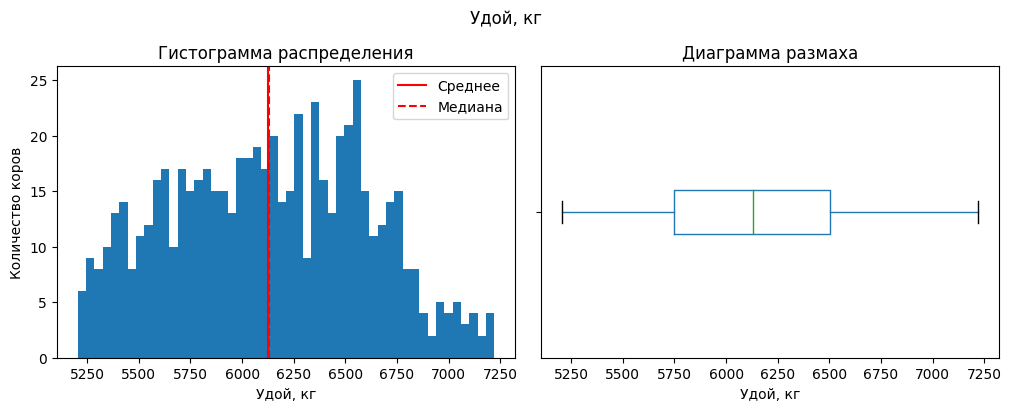

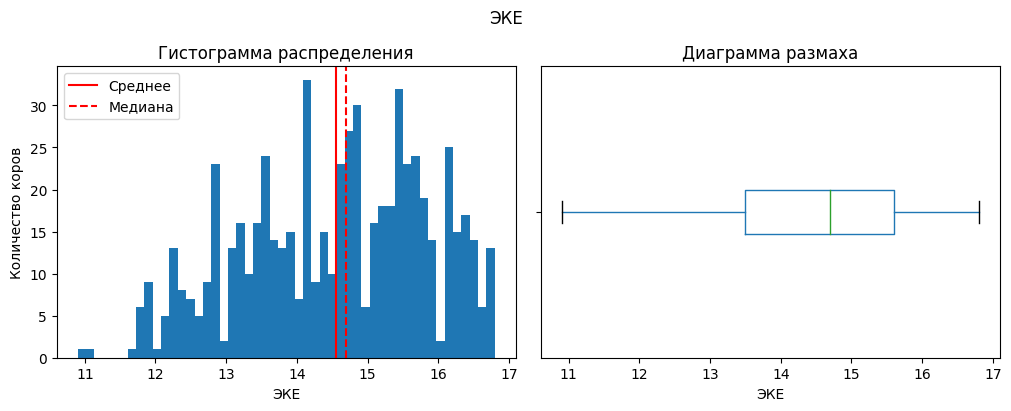

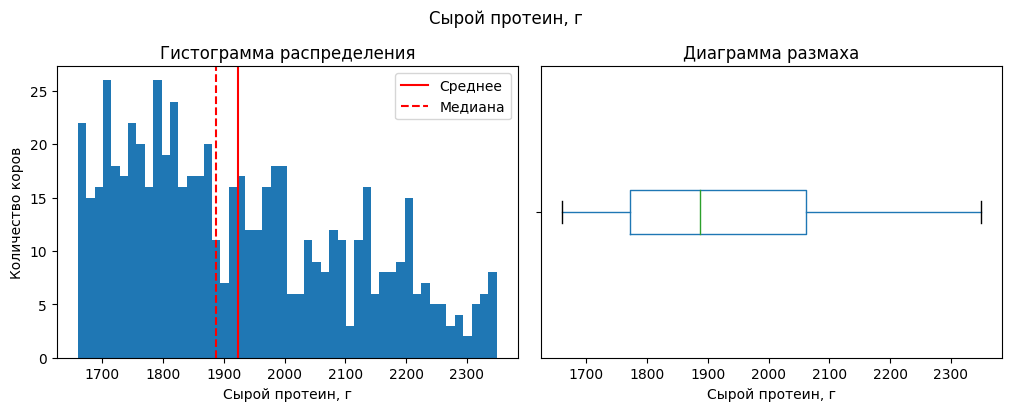

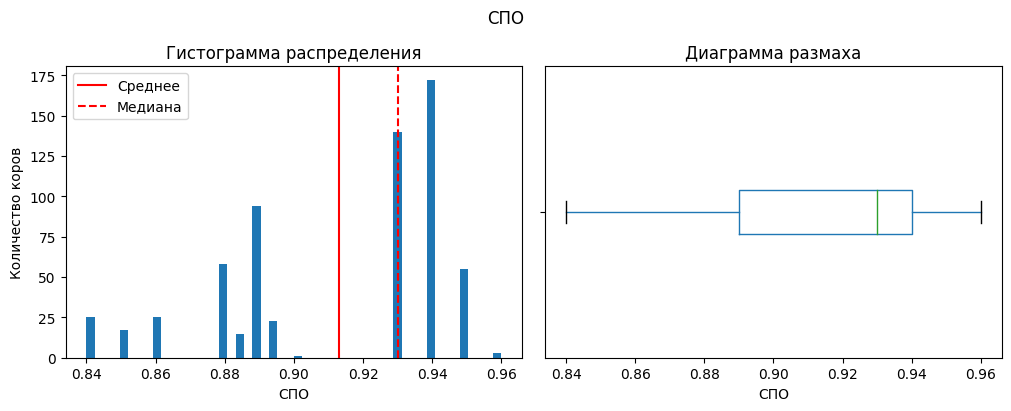

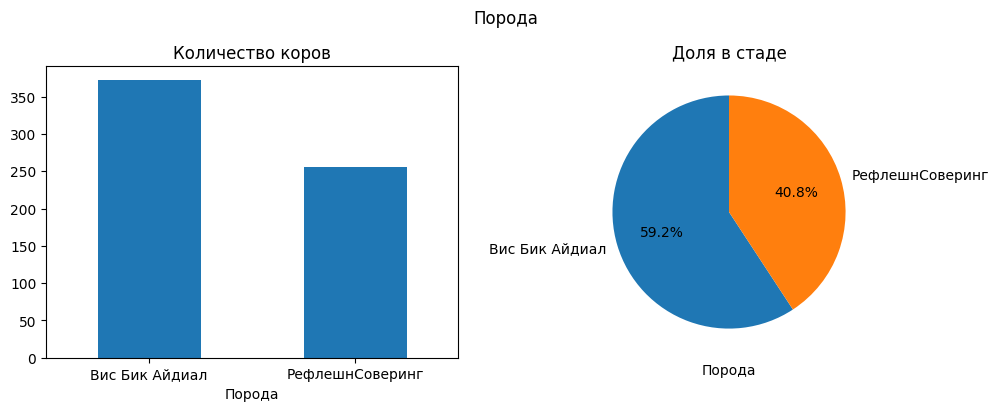

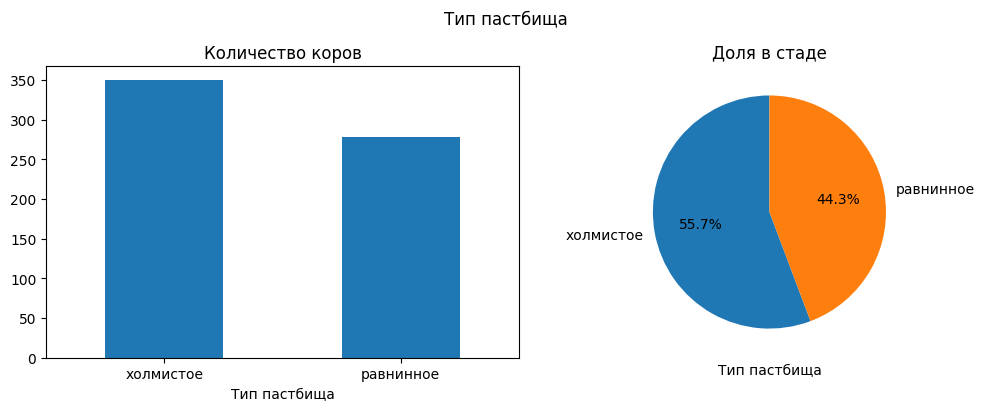

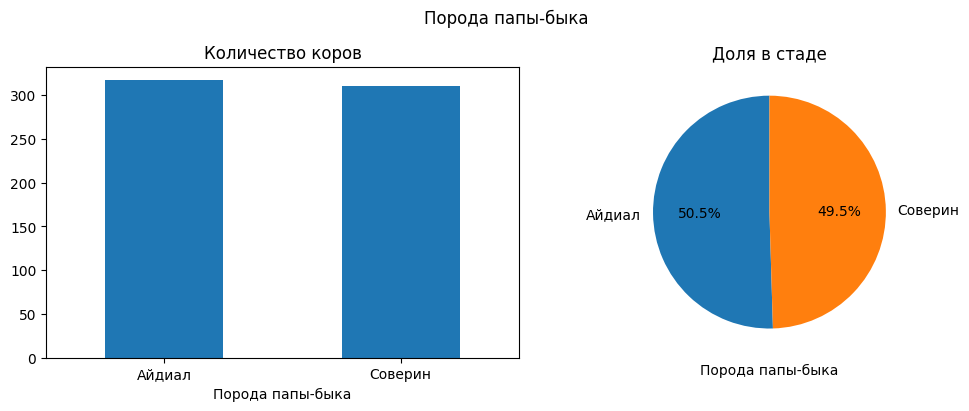

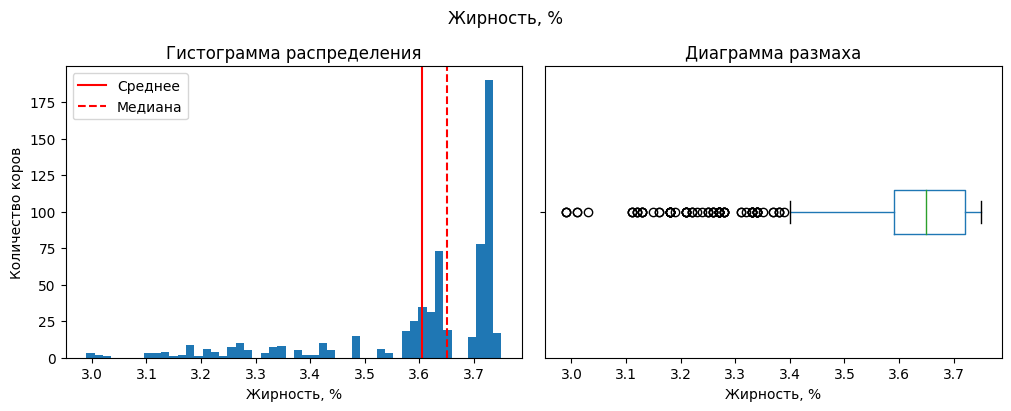

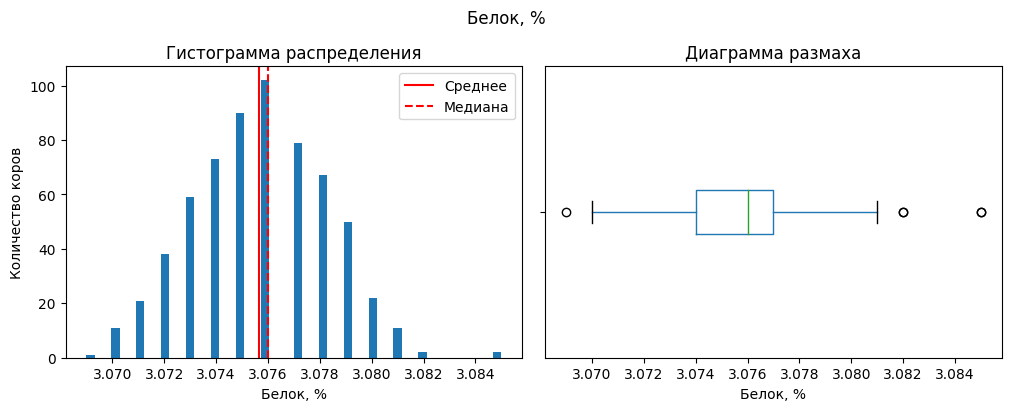

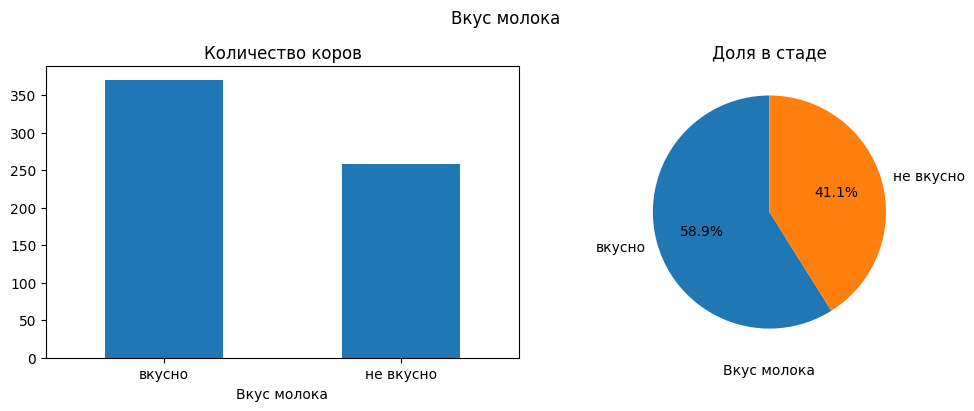

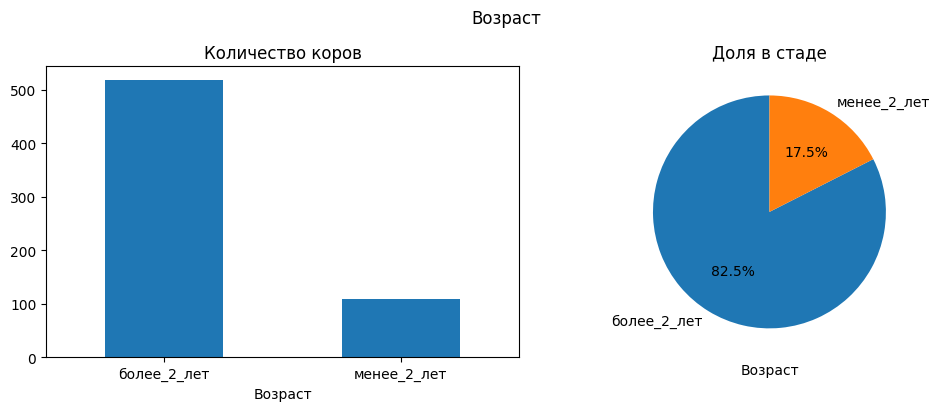

In [38]:
# строим графики для каждого признака в таблице 'cows'
for feature in cows.columns.drop('id'):
    stat_plots(cows, feature)

**Выводы**
- Количественные признаки:
    - Целевой признак «Удой» имеет примерно симметричное распределение (медиана и среднее почти совпадают).
    - Из количественных признаков необычный характер имеет распределение жирности молока: у большей части коров жирность молока составляет ≈ 3,6—3,7 %, но есть коровы, у которых жирность молока лежит в диапазоне от ≈3 до 3,5 %, что проявляется в виде «хвоста» на гистограмме распределения и большого числа выбросов на диаграмме размаха.
    - Отдельные выбросы на диаграмме размаха также показывает содержание белка в молоке, но в целом распределение похоже на нормальное.
- Категориальные признаки:
    - Все 5 категориальных признаков являются бинарными, т.е. каждый признак имеет может принимать только одно из 2-х значений.
    - Доли значений большинства признаков сопоставимы — для признаков «Порода», «Тип пастбища», «Порода папы-быка» соотношение долей находится в диапазоне от 50/50 до 60/40.
    - По признаку «Возраст» наблюдается дисбаланс: коров младше 2 лет в стаде фермера в 4,7 раза меньше.


#### Данные о папе каждой коровы

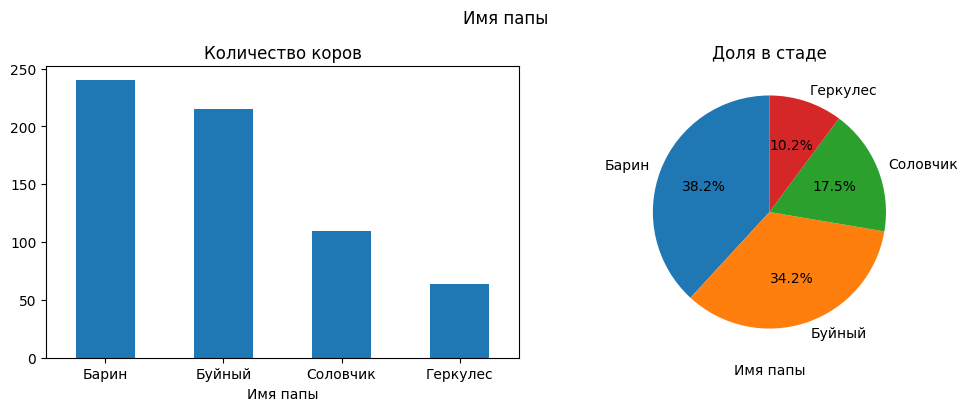

In [39]:
# строим графики для единственного признака в таблице 'dads'
stat_plots(dads, 'dad_name');

Доли имён сопоставимы: от 10 до 38 %, слишком малых долей нет.

#### Данные о коровах для покупки

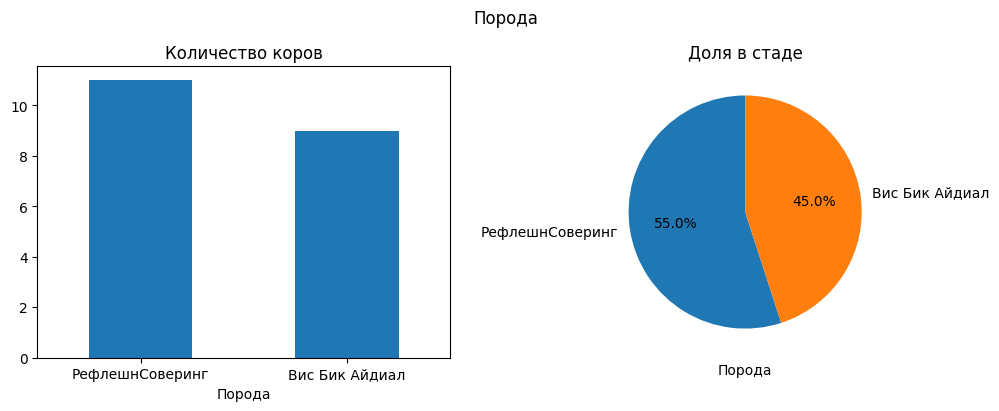

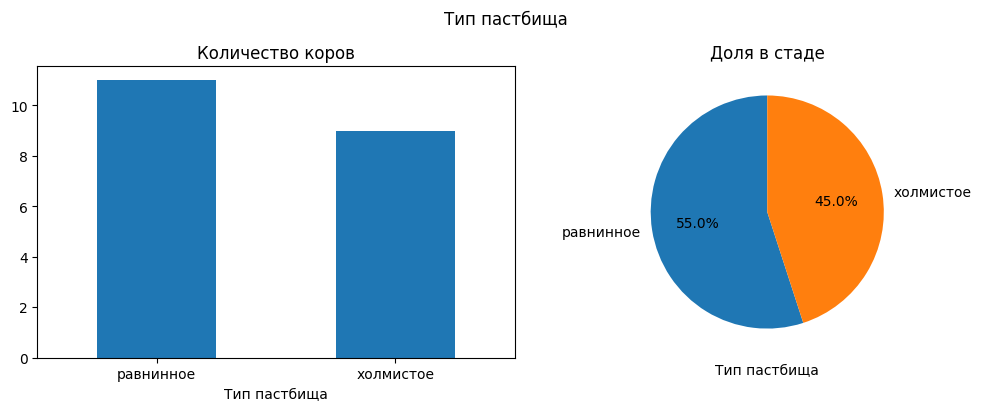

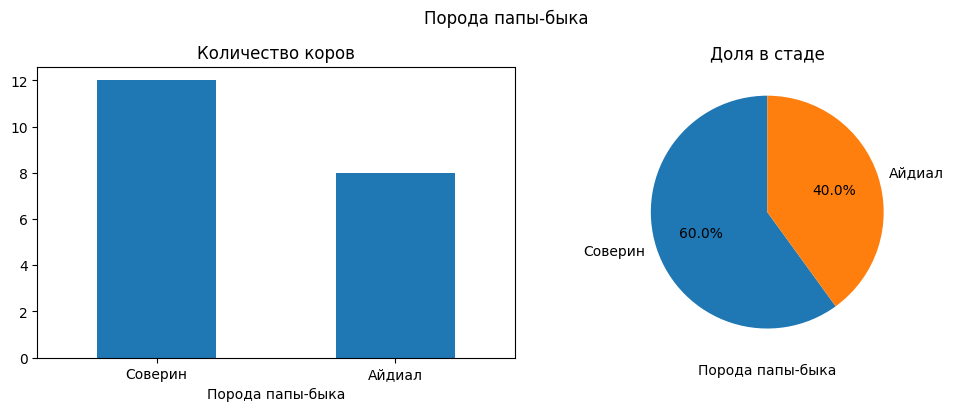

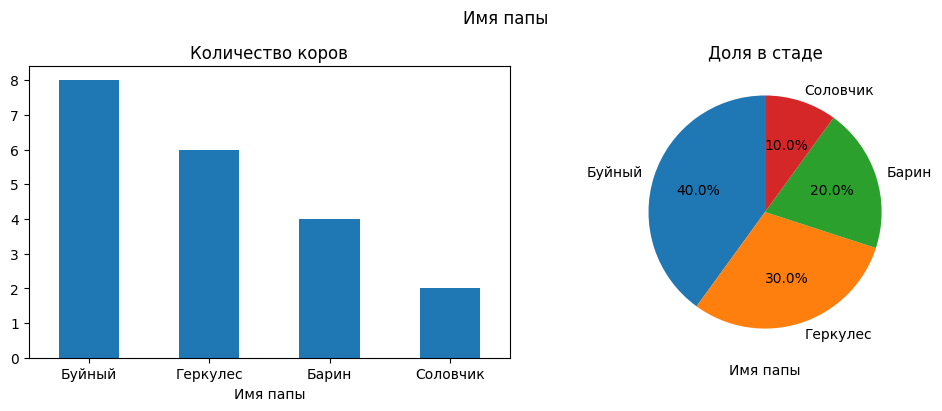

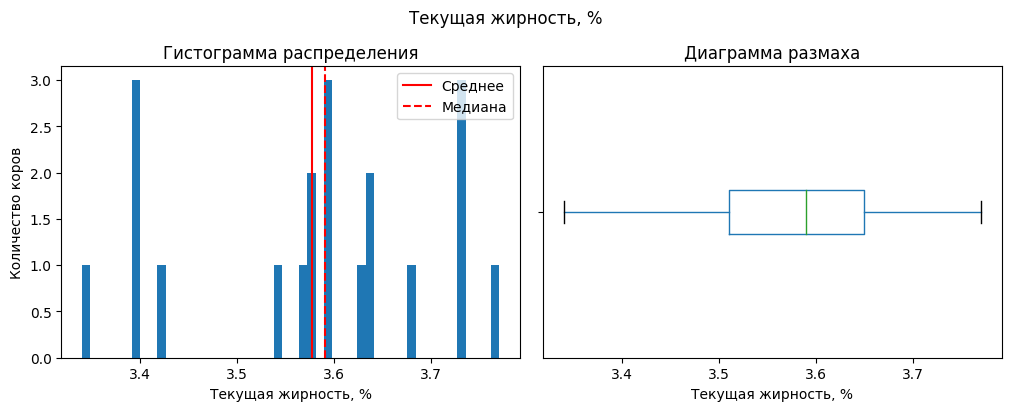

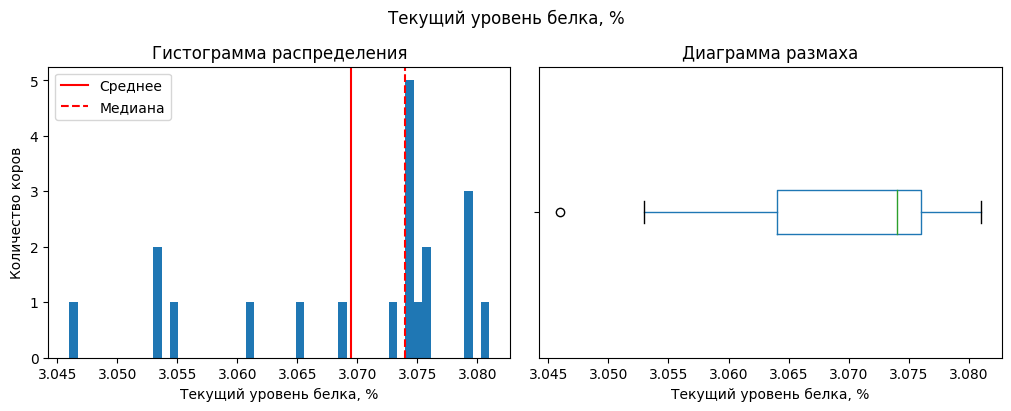

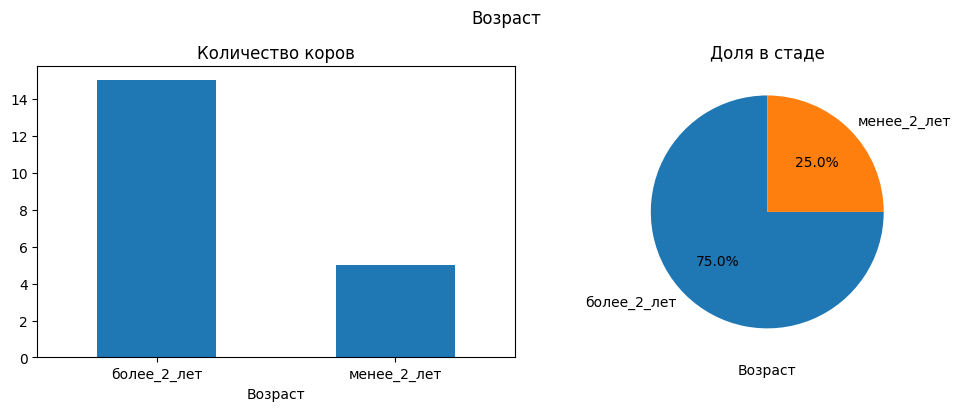

In [40]:
# строим графики для каждого признака в таблице 'cows'
for feature in cows_buy.columns:
    stat_plots(cows_buy, feature)

В данных о коровах, предлагаемых для покупки, доли значений категориальных признаков сопоставимы, а распределения количественных признаков не содержат аномалий.

Можно отметить, что распределение по жирности молока более равномерное, а по содержанию белка — наоборот, сильнее смещено в сторону более высоких значений.

### Выводы

Для получения качественного прогноза целевого признака важно, чтобы в данных, используемых для обучения модели машинного обучения, не было аномалий, которые плохо влияют на точность предсказаний модели. Поэтому для улучшения качества данных нужно удалять выбивающиеся значения признаков (выбросы).

- В результате **статистического анализа** в данных о стаде фермера обнаружена запись о корове с аномально большим значением удоя. Наличие аномалий в тренировочных данных плохо влияет на качество модели машинного обучения, поэтому эта запись удалена из данных. Качество данных от удаления 1 из 629 строк не пострадает.

- **Визуализация распределений** значений **количественных признаков** с помощью гистограмм и диаграмм размаха позволила убедиться в отсутствии значимых проблем в данных, требующих корректировки.

- **Визуализация распределений** значений **категориальных признаков** с помощью столбчатых и круговых диаграмм позволила установить, что в данных отсутствуют аномально редкие значения.

## Корреляционный анализ признаков

### Анализ коэффициентов корреляции

Выделим количественные и категориальные признаки в данных о коровах в стаде фермера (таблица `cows`). Для этого используем функции `get_num_features()` и `get_cat_features()`.

In [41]:
def get_num_features(data):
    """
    Возвращает список количественных признаков в таблице (типы данных 'int64' и 'float64'), кроме 'id'.
    """
    return data.select_dtypes(include=['int64', 'float64']).columns.drop(['id'], errors='ignore').tolist()

def get_cat_features(data):
    """
    Возвращает список категориальных признаков в таблице (типы данных 'category' и 'object').
    """
    return data.select_dtypes(include=['category', 'object']).columns.tolist()

In [42]:
# количественные признаки в таблице 'cows'
cows_num_features = get_num_features(cows)

# категориальные признаки в таблице 'cows'
cows_cat_features = get_cat_features(cows)

print('Количественные признаки:', cows_num_features)
print('Категориальные признаки:', cows_cat_features)

Количественные признаки: ['milk_yield_kg', 'energetic_feed_units', 'raw_protein_g', 'sugar_protein_ratio', 'fat_percentage', 'protein_percentage']
Категориальные признаки: ['breed', 'pasture_type', 'dad_breed', 'milk_taste', 'age_category']


Рассчитаем коэффициенты корреляции между всеми количественными признаками, чтобы определить:
- характер связи между каждым из входных признаков и целевым признаком в задаче регрессии («Удой»), т.к. модель линейной регрессии стоит использовать, только если между целевым и входными признаками есть линейная зависимость.
- степень связи входных признаков между друг с другом, чтобы проверить входные признаки на мультиколлинеарность.

Построенные ранее гистограммы распределения количественных признаков показали, что распределение большинства признаков сильно отличается от нормального. Нормальное распределение имеет только признак «Белок», но он имеет выбросы. Обычно используемая при исследовании связей между признаками корреляция Пирсона чувствительна к отклонениям распределения от нормального и к выбросам в данных, что может исказить результаты анализа корреляций. Поэтому для определения степени связи между количественными признаками в данных используем **корреляцию Спирмена**.

Для этого рассчитаем матрицу корреляции признаков и визуализируем её в виде тепловой карты с помощью функции `corr_matrix()`, указав дополнительный аргумент `method='spearman'`. 

In [43]:
def corr_matrix(data, features=None, method='pearson'):
    """
    Выводит матрицу корреляции количественных признаков features в данных data
    в виде тепловой карты.
    Дополнительный параметр:
    method - метод расчёта корреляции, по умолчанию 'pearson':
        'pearson' - корреляция Пирсона, 
        'spearman' - корреляция Спирмена,
        'kendall' - корреляция Кендалла,
        'phik' - корреляция фи.
    """
    if method == 'pearson':
        method_name = 'Пирсона'
    elif method == 'spearman':
        method_name = 'Спирмена'
    elif method == 'kendall':
        method_name = 'Кендалла'
    elif method == 'phik':
        method_name = '$\phi_k$'
    else:
        print('Неправильно указан метод расчёта корреляций.')
        return None

    if features is None:
        features = data.columns
         
    # расчёт матрицы корреляции
    if method in [ 'pearson', 'spearman', 'kendall']:
        corr_data = data[features].corr(method=method)
        vmin = -1
        vmax = 1
        center = 0
    elif method == 'phik':
        try:
            corr_data = data[features].phik_matrix(verbose=False)
            vmin = 0
            vmax = 1
            center = 0
        except:
            print('Ошибка расчёта. Вероятно, проблема с модулем phik.')
            return None

    # метки вдоль осей - описания признаков
    labels = [get_column_name(col) for col in features]
    
    # строим тепловую карту по матрице корреляции
    ax = sns.heatmap(corr_data, 
                     annot=True,
                     fmt='.2f',
                     square=True,
                     cmap='coolwarm', 
                     vmin=vmin,
                     vmax=vmax,
                     center=center,
                     xticklabels=labels,
                     yticklabels=labels,
    )
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'Коэффициенты корреляции {method_name}')

    return ax

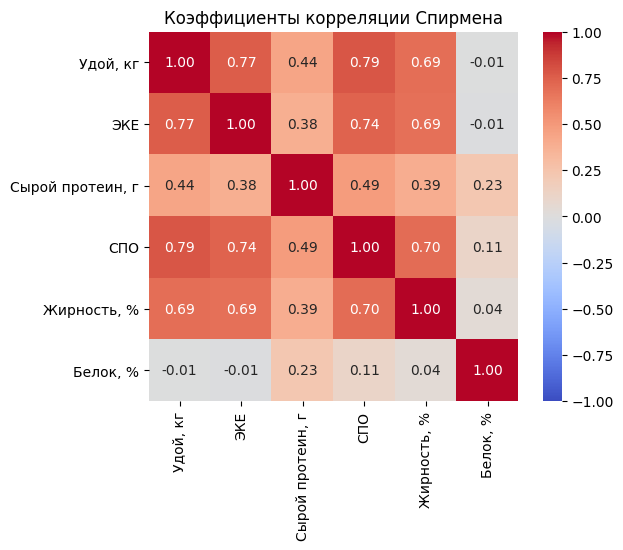

In [44]:
# строим матрицу корреляции Спирмена количественных признаков
corr_matrix(cows, cows_num_features, method='spearman');

Анализ матрицы корреляции количественных признаков с использованием шкалы Чеддока показывает:
- Целевой признак «Удой» имеет **высокую** степень связи с признаками СПО (коэффициент корреляции 0.79) и ЭКЕ (коэффициент корреляции 0.77) и **заметную** степень связи с признаком «Жирность» (коэффициент корреляции 0.69). Степень линейной связи с признаком «Сырой протеин» **умеренная** (коэффициент корреляции 0.44). Связь целевого признака с признаком «Белок» практически **отсутствует** (коэффициент корреляции -0.01).
- Среди входных признаков максимальный коэффициент корреляции между собой имеют ЭКЕ и СПО (коэффициент корреляции 0.74). Однако о мультиколлинеарности говорят при значении коэффициента корреляции более 0.9. Поэтому все признаки можно считать линейно независимыми.

Для анализа связи целевого признака в задаче регрессии «Удой» с бинарными категориальными признаками в данных рассчитаем коэффициенты корреляции фи ($\phi_k$) и визуализируем матрицу корреляции в виде тепловой карты с помощью функции `corr_matrix()`, указав дополнительный аргумент `method='phik'`. 

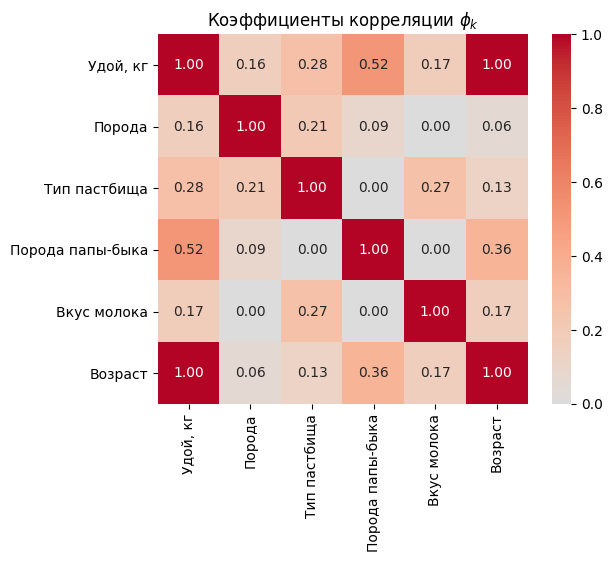

In [45]:
# строим матрицу корреляции Фи целевого и категориальных входных признаков
corr_matrix(cows, ['milk_yield_kg'] + cows_cat_features, method='phik');

Анализ матрицы корреляции целевого признака и категориальных входных признаков показывает:
- На значение целевого признака «Удой» очень сильно влияет категориальный признак «Возраст» (менее 2 лет или более) - коэффициент корреляции 1. Заметное влияние имеет признак «Порода папы-быка» (коэффициент корреляции 0.52). Влияние остальных категориальных признаков слабое (коэффициент корреляции < 0.3), из них наибольший коэффициент корреляции с целевым у признака «Тип пастбища».
- Мультиколлинеарность между категориальными признаками не обнаружена (коэффициенты корреляции ≤ 0.36).

**Коэффициент инфляции дисперсии** (variance inflation factor, VIF) — это мера, которая помогает обнаружить мультиколлинеарность в множественной регрессионной модели. Он показывает, насколько увеличивается дисперсия оценки коэффициента регрессии для данного признака из-за линейной зависимости с другими признаками.

In [46]:
def check_vif(data, features):
    """
    Выполняет проверку количественных признаков features 
    в данных data на мультиколлинеарность с помощью расчёта VIF.
    """
    # добавление константы для перехвата
    X = add_constant(data[features])

    # расчет VIF для каждого признака
    VIFs = pd.DataFrame()
    VIFs['feature'] = X.columns
    VIFs['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # оформляем и выводим результаты
    VIFs['feature'] = VIFs['feature'].map(get_column_name)
    VIFs['VIF'] = VIFs['VIF'].map('{:.2f}'.format)

    return VIFs.rename(columns={'feature': "признак"})

In [47]:
# проверяем количественные признаки на мультиколлинеарность
# с помощью VIF
check_vif(cows, cows_num_features)

,признак,VIF
0,const,1576350.64
1,"Удой, кг",3.56
2,ЭКЕ,2.96
3,"Сырой протеин, г",1.37
4,СПО,3.50
5,"Жирность, %",1.88
6,"Белок, %",1.09


Потенциальные проблемы с мультиколлинеарностью возможны, если значения VIF выше 5. В рассматриваемых данных значения VIF для всех количественных признаков не превышают 3.56, что указывает на отсутствие мультиколлинеарности.

### Анализ диаграмм рассеяния

Для установления характера связи между каждым из входных признаков и целевым признаком в задаче регрессии («Удой») построим диаграммы рассеяния для признака «Удой» и каждого из остальных количественных признаков с учётом значения категориальных признаков. Различные значения категориальных признаков покажем цветом точек на диаграмме.

Используем для построения матрицы диаграмм рассеяния для многих входных признаков функцию `scatter_plots()`.

In [48]:
def scatter_plots(data, target_feature, num_features, cat_features):
    """
    Строит матрицу диаграмм рассеяния целевого признака 'target_feature' 
    в зависимости от каждого из количественных признаков из списка 'num_features'
    с группировкой по каждому из категориальных признаков из списка 'cat_features'.
    """   
    # строим матрицу диаграмм рассеяния
    for cat_feature in cat_features:
        g = sns.PairGrid(data, hue=cat_feature, x_vars=num_features, y_vars=target_feature,
                        despine=False)
        g.map(sns.scatterplot, alpha=0.5)
        # добавляем легенду
        g.add_legend(ncol=2, loc='lower right', bbox_to_anchor=(0.5, 1), frameon=True, 
                     title=get_column_name(cat_feature))
        # подписи по оси Y
        g.set(ylabel=get_column_name(target_feature))
        # подписи по оси X
        for i, num_feature in enumerate(num_features):
            g.axes[0, i].set_xlabel(get_column_name(num_feature))

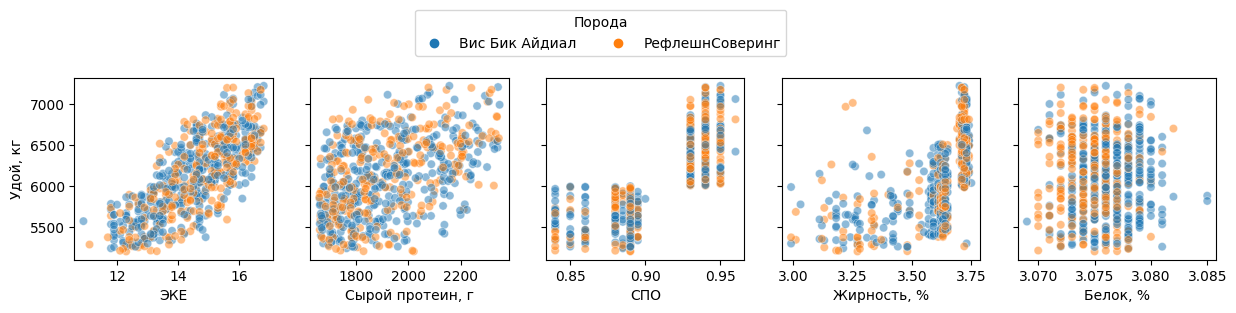

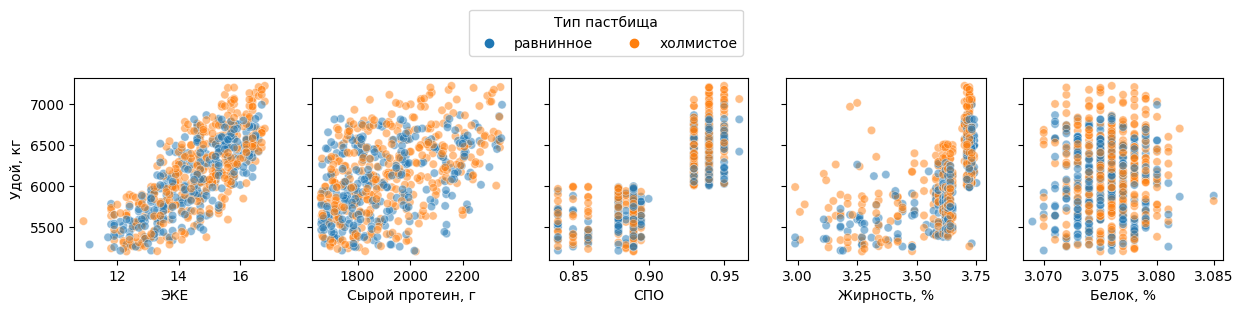

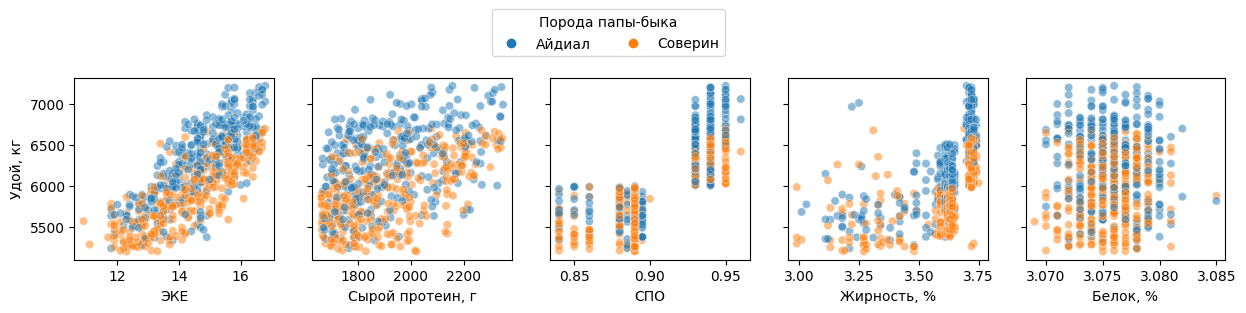

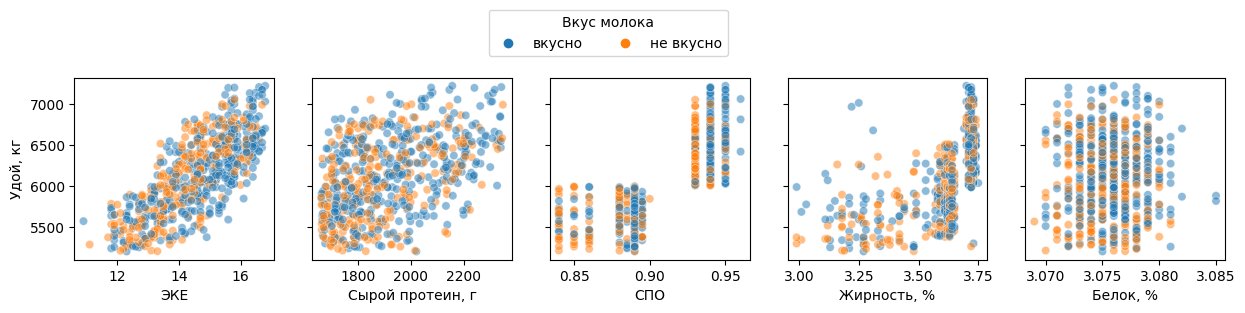

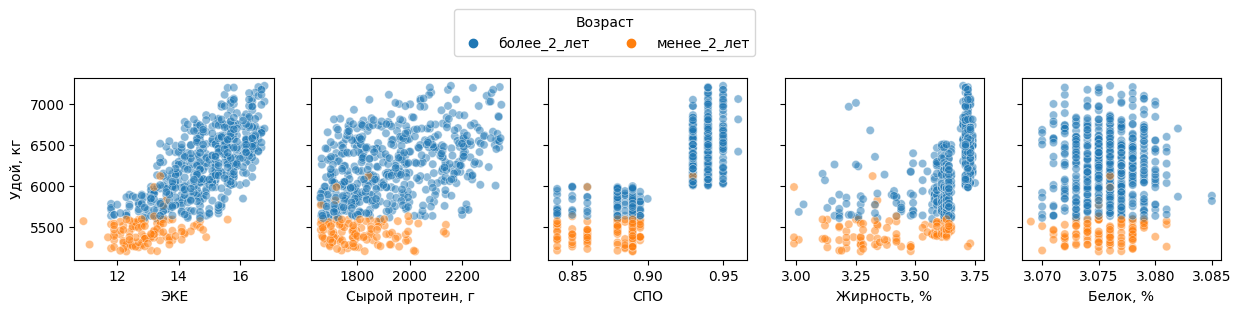

In [49]:
# удаляем целевой признак из списка количественных признаков
cows_num_features_ = cows_num_features.copy()
cows_num_features_.remove('milk_yield_kg')

# строим матрицу диаграмм рассеяния
scatter_plots(cows, 'milk_yield_kg', cows_num_features_, cows_cat_features);

Анализ диаграмм рассеяния показывает:
- Между признаками «Удой» и ЭКЕ связь не совсем линейная, а более похожа на квадратичную.
- Между признаками «Удой» и «Сырой протеин» связь умеренная: корреляция просматривается, но разброс значений высокий.
- Зависимость признака «Удой» от признака СПО тоже имеет нелинейный (ступенчатый) характер: На их диаграмме рассеяния коровы сгруппированы в два кластера с низким и высоким значением удоя. Граница между кластерами проходит при значении СПО ≈0.92 (это можно было видеть ранее на гистограмме распределения).
- Между признаками «Удой» и «Жирность» связь тоже нелинейная: при жирности менее 3.5 % зависимость отсутствует, при большей жирности есть положительная связь.
- Между признаками «Удой» и «Белок» связь отсутствует.

Анализ диаграмм рассеяния с учётом влияния категориальных признаков на характер связи между количественными входными признаками и целевым признаком «Удой» подтверждает выводы, сделанные в результате анализа коэффициентов корреляции фи ($\phi_k$):
- Влияние признаков «Порода» и «Вкус молока» очень слабое.
- Влияние признака «Тип пастбища» присутствует, но слабое. Заметно, что наибольший удой имеют коровы, которые пасутся на холмистых пастбищах.
- Влияние признака «Порода папы-быка» заметное: у коров с папой породы Айдиал удой в среднем больше, чем у коров с папой породы Соверин.
- Влияние признака «Возраст» очень сильное,  причём видна чёткая граница между величиной удоя молодых и взрослых коров: удой коров возрастом менее 2 лет почти никогда не превышает ≈5600 кг, а у всех более взрослых превышает это значение. 

Проверим, что зависимость удоя от ЭКЕ лучше описывается квадратичной функцией, чем линейной. Для этого аппроксимируем зависимости удоя от ЭКЕ и от ЭКЕ в квадрате линейной регрессией, а затем сравним коэффициенты детерминации R² обеих аппроксимаций. Используем для этого функцию `plot_linreg()`.

In [50]:
def plot_linreg(x, y):
    """
    Строит диаграмму рассеяния y относительно x 
    и аппроксимирует зависимость y(x) линейной регрессией 
    с указанием коэффициента детерминации R².
    """
    # аппроксимируем зависимость y(x) линейной регрессией
    x_ = x.values.reshape(-1, 1)
    lin_reg = LinearRegression().fit(x_, y)
    # получаем значения для графика линейной регрессии
    x_fit = np.array([x.min(), x.max()])
    y_fit = lin_reg.intercept_ + lin_reg.coef_[0] * x_fit
    # рассчитываем R2 аппроксимации
    r2 = lin_reg.score(x_, y)
    
    # строим диаграмму рассеяния
    ax = sns.scatterplot(x=x, y=y)
    # строим график линейной регрессии
    sns.lineplot(x=x_fit, y=y_fit, ax=ax, color='r', label=f'R² = {r2:.4f}')
    
    # оформляем графики
    ax.set_xlabel(get_column_name(x.name))
    ax.set_ylabel(get_column_name(y.name))
    
    return ax

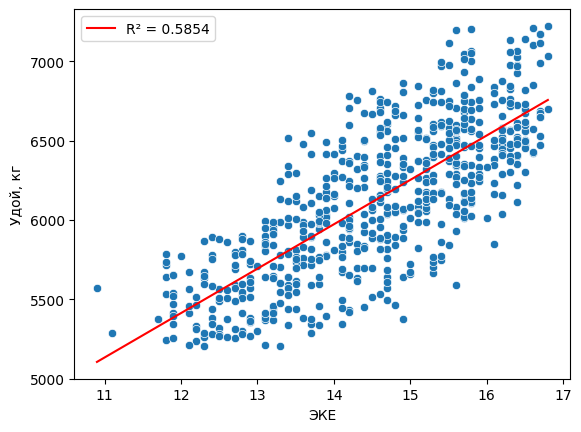

In [51]:
# аппроксимация зависимости линейной регрессией
plot_linreg(x=cows['energetic_feed_units'], y=cows['milk_yield_kg']);

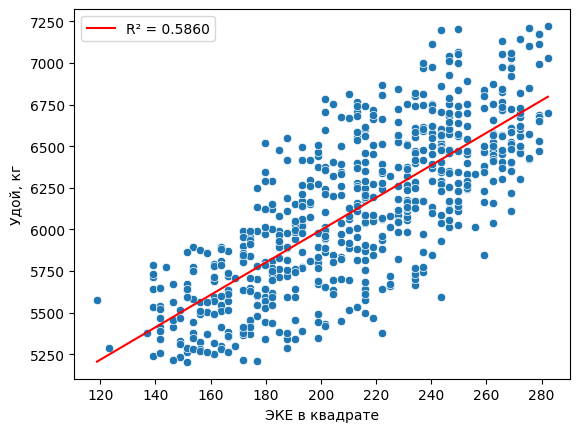

In [52]:
# аппроксимация зависимости линейной регрессией
ax = plot_linreg(x=cows['energetic_feed_units']**2, y=cows['milk_yield_kg'])
ax.set_xlabel('ЭКЕ в квадрате');

Коэффициент детерминации R² для зависимости удоя от ЭКЕ в квадрате получился больше, значит зависимость удоя от ЭКЕ лучше описывается квадратичной функцией, чем линейной. 

### Выводы

В рамках **корреляционного анализа** признаков в данных о коровах в стаде фермера:
1. Рассчитаны коэффициенты корреляции Спирмена между всеми количественными признаками в данных и построена матрица корреляции. Анализ матрицы корреляции количественных признаков показал:
    - Целевой признак «Удой» имеет **высокую** степень линейной связи с признаками СПО и ЭКЕ и **заметную** степень линейной связи с признаком «Жирность» (коэффициент корреляции 0.60). Степень линейной связи с признаком «Сырой протеин» **умеренная** (коэффициент корреляции 0.45). Линейная связь с признаком «Белок» **отсутствует**.
    - Мультиколлинеарность между количественными признаками не наблюдается.
2. Рассчитаны коэффициенты корреляции фи ($\phi_k$) между целевым признаком в задаче регрессии («Удой») и категориальными признаками в данных (все они являются бинарными). Анализ корреляций целевого признака с входными категориальными признаками показал:
    - Среди категориальных входных признаков связь с целевым признаком «Удой» показывают признаки «Возраст» (очень сильная связь), «Порода папы-быка» (заметная связь) и «Тип пастбища» (умеренно-слабая связь).
    - Мультиколлинеарность между категориальными признаками не наблюдается.
3. Построены диаграммы рассеяния для целевого признака «Удой» и каждого из остальных количественных признаков с учётом значения категориальных признаков. Анализ диаграмм рассеяния подтвердил выводы о степени связи между входными признаками и целевым, сделанные в результате анализа коэффициентов корреляции. Кроме того, установлено:
    - Связь между целевым признаком «Удой» и признаками ЭКЕ, СПО и «Жирность» нелинейная.
    - Наибольший удой имеют коровы, которые пасутся на холмистых пастбищах.
    - У коров с папой породы Айдиал удой в среднем больше, чем у коров с папой породы Соверин.
    - Существует чёткое различие между величиной удоя молодых и взрослых коров: удой коров возрастом менее 2 лет меньше, чем у более взрослых. 

Таким образом, в результате **корреляционного анализа** признаков в данных о коровах в стаде фермера:
- Определена сила связи целевого признака «Удой» с входными признаками.
- Установлено, что зависимость целевого признака от некоторых входных признаков имеет нелинейный характер. Для построения качественной модели линейной регрессии эту нелинейность желательно устранить путём преобразования исходных данных.
- Установлено отсутствие мультиколлинеарности между входными признаками.

## Задача регрессии

### Первая модель линейной регресии

В задаче регрессии требуется предсказать удой коров, которых фермер хочет изучить перед покупкой, на основе выявленных связей между величиной удоя и другими признаками, характеризующими коров в стаде фермера.

Целевой признак в задаче регрессии — `milk_yield_kg` (Удой, кг).

In [53]:
# целевой признак
regression_target = 'milk_yield_kg'

Входные (прогнозирующие) признаки для модели линейной регрессии должны быть линейно связаны с целевым признаком, т.е. иметь значимую корреляцию с ним. Слабая линейная связь (когда коэффициент корреляции < 0.3) между целевыми и выходными признаками не подходит для линейной регрессии.

Кроме того, нужно учитывать причинно-следственные связи между входными признаками и целевым.

Исходя из сформулированных принципов, проведём анализ входных признаков, чтобы отобрать те из них, которые подходят для линейной регрессии:
- ЭКЕ — **подходит**: коэффициент корреляции 0.77, связь с целевым признаком монотонная и близка к линейной;
- Сырой протеин, г — **подходит**, несмотря на большой разброс: коэффициент корреляции 0.45, связь с целевым признаком примерно линейная;
- СПО — **подходит**: несмотря на существенно нелинейный (ступенчатый) характер, связь с целевым признаком монотонная и имеет высокий коэффициент линейной корреляции 0.81;
- Порода — не подходит: связь с целевым признаком слабая (коэффициент корреляции 0.16);
- Тип пастбища — **подходит**: хотя связь с целевым признаком  слабая (коэффициент корреляции 0.28), влияние признака было заметно на диаграмме рассеяния при больших значениях удоя;
- Порода папы-быка — **подходит**: связь с целевым признаком заметная (коэффициент корреляции 0.52);
- Жирность, Белок, Вкус молока — не подходят, т.к. это характеристики молока, которые не связаны причинно-следственной связью с целевым признаком «Удой» (который также относится к характеристикам молока). Кроме того, в данных о коровах для покупки признаки «Жирность» и «Белок» соответствуют неизвестным параметрам питания коров, поэтому использовать их для прогнозирования нельзя;
- Возраст — **подходит**: связь с целевым признаком очень сильная (коэффициент корреляции 1.00).

Таким образом, для построения первой модели линейной регрессии используем следующие входные признаки:
- `energetic_feed_units` (ЭКЕ),
- `raw_protein_g` (Сырой протеин, г),
- `sugar_protein_ratio` (СПО),
- `pasture_type` (Тип пастбища),
- `dad_breed` (Порода папы-быка),
- `age_category` (Возраст).

Сформируем список входных признаков `features_1` для модели.

In [54]:
# входные признаки
features_1 = [
              'energetic_feed_units', 
              'raw_protein_g', 
              'sugar_protein_ratio', 
              'pasture_type',
              'dad_breed', 
              'age_category',
             ]

Подготовим данные и обучим на них модель линейной регрессии:

1. **Разделим данные** на тренировочную и тестовую выборки в отношении 3:1.

2. **Подготовим данные** для модели: закодируем категориальные признаки и отмасштабируем количественные признаки в тренировочной выборке и в тестовой выборке. Количественные признаки приведём к одному масштабу с помощью стандартизации, используя `StandardScaler`. Категориальные признаки закодируем в набор бинарных, используя `OneHotEncoder`. Для подготовки входных данных используем функцию `prepare_feature_data()`. Эта функция также позволяет проверить результат масштабирования количественных признаков в тренировочной выборке по гистограмме распределения и диаграмме размаха.

3. Создадим **модель линейной регрессии** и обучим её на подготовленных данных.

4. Оценим **качество модели** на тестовой выборке: рассчитаем метрики качества модели MSE, RMSE, MAE, коэффициент детерминации R². Для этого используем функцию `model_scores_regression()`.

5. Рассчитаем **доверительный интервал прогноза** модели — квантили ошибки модели на тренировочных данных для заданного уровня доверия (вероятности того, что истинное значение попадает в интервал). Для расчёта квантилей для заданного уровня доверия используем функцию `get_quantiles()`. Значение уровня доверия установим по умолчанию 0.95.

6. Чтобы проверить, насколько хорошо модель замечает взаимосвязи между признаками, проведём **анализ остатков**. Для этого используем функцию `check_residuals()`, которая строит графики для визуального анализа остатков:
    - гистограмму распределения остатков,
    - диаграмму рассеяния остатков и предсказаний модели.

7. Дополнительно проведём **анализ коэффициентов** регрессии, чтобы определить степень влияния каждого из входных признаков на целевой. Для этого используем функцию `check_coef_linreg()`.

Все этапы подготовки данных, создания, обучения и анализа модели объединим в функцию `make_linreg_model()`.

In [55]:
def prepare_feature_data(X, encoder=None, scaler=None, check_scaling=False):
    """
    Кодирует категориальные признаки с помощью OneHotEncoder 
    и масштабирует количественные признаки с помощью StandardScaler
    во входных данных 'X'.
    
    Если не заданы аргументы 'encoder' и 'scaler', то входные данные 'X' - тренировочная выборка 'X_train'.
    Тогда функция возвращает, кроме преобразованных данных 'X_out', объекты
    encoder - объект класса OneHotEncoder,
    scaler - объект класса StandardScaler.
    
    Если аргументы 'encoder' и 'scaler' заданы, то входные данные 'X' - тестовая выборка 'X_test'.
    Тогда функция возвращает только преобразованные данные 'X_out'.
    
    Необязательный параметр: 
    check_scaling - строить ли графики для проверки масштабирования количественных признаков 
                    (по умолчанию False).
    """
    if len(X) == 0:
        return X
    # выбираем режим работы функции: для тренировочной или для тестовой выборки
    if encoder is None and scaler is None:
        mode = 'train'
    elif encoder is not None or scaler is not None:
        mode = 'test'
    else:
        print('Ошибка задания аргументов функции prepare_feature_data.')
        return X
    
    # получаем список количественных признаков
    num_features = get_num_features(X)
    # получаем список категориальных признаков
    cat_features = get_cat_features(X)
    
    # выводим списки количественных и категориальных признаков,
    # используемых для обучения модели
    if mode == 'train':
        print('Количественные признаки:', [get_column_name(col) for col in num_features])
        print('Категориальные признаки:', [get_column_name(col) for col in cat_features])
    
    if len(cat_features) > 0:
        if mode == 'train':
            # создаём экземпляр класса OneHotEncoder с аргументом для избежания dummy-trap
            encoder = OneHotEncoder(drop='first', sparse=False)
            # настраиваем кодировщик и кодируем категориальные признаки в тренировочной выборке
            X_ohe = encoder.fit_transform(X[cat_features])
        elif mode == 'test':
            # кодируем категориальные признаки в тестовой выборке
            X_ohe = encoder.transform(X[cat_features])
        # получаем от кодировщика список названий кодированных признаков 
        encoded_cat_features = encoder.get_feature_names(cat_features)
        # преобразуем массивы с кодированными данными в датафреймы
        X_ohe = pd.DataFrame(X_ohe, columns=encoded_cat_features, dtype='int')
    else:
        X_ohe = pd.DataFrame()

    if len(num_features) > 0:
        if mode == 'train':
            # создаём экземпляр класса StandardScaler
            scaler = StandardScaler()
            # настраиваем скейлер и масштабируем количественные признаки в тренировочной выборке
            X_scaled = scaler.fit_transform(X[num_features])
        elif mode == 'test':
            # масштабируем количественные признаки в тестовой выборке
            X_scaled = scaler.transform(X[num_features])
        # преобразуем массивы с масштабированными данными в датафреймы
        X_scaled = pd.DataFrame(X_scaled, columns=num_features)
    else:
        X_scaled = pd.DataFrame()

    if check_scaling:
        # проверка результата масштабирования количественных признаков
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), constrained_layout=True)
        num_feature_names = [get_column_name(col) for col in num_features]
        X_scaled[num_features].plot.hist(bins=10, ax=axes[0], alpha=0.7)
        axes[0].set_title('Гистограмма распределения')
        axes[0].set_xlabel('Z-значение')
        axes[0].set_ylabel('Количество')
        axes[0].legend(num_feature_names)
        axes[1].boxplot(X_scaled[num_features], vert=False, labels=num_feature_names)
        axes[1].set_title('Диаграмма размаха')
        fig.suptitle('Проверка результата масштабирования количественных признаков в тренировочной выборке')
        plt.show()
    
    # объединяем датафреймы с кодированными категориальными и масштабированными количественными признаками
    X_out = pd.concat([X_ohe, X_scaled], axis=1)

    if mode == 'train':
        return X_out, encoder, scaler
    elif mode == 'test':
        return X_out

In [56]:
def check_coef_linreg(model, X_train):
    """
    Возвращает таблицу с коэффициентами линейной регрессии.
    """
    # получаем список коэффициентов и добавляем к ним свободный член
    coefs = [model.intercept_] + model.coef_.tolist()
    # получаем имена признаков в тренировочной выборке и добавляем к ним константу 1
    feature_names = ['1'] + X_train.columns.tolist()
    # формируем таблицу
    coef_table = pd.DataFrame({'feature': feature_names, 'coef': coefs})
    
    return coef_table

In [57]:
def model_scores_regression(y_test, y_pred):
    """
    Возвращает и выводит в виде таблицы значения метрик качества 
    модели регрессии: MSE, RMSE, MAE, R2.
    """
    # считаем метрики:
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # объединяем значения в Series
    scores = pd.Series([mse, rmse, mae, r2], index=['MSE', 'RMSE', 'MAE', 'R2'])
    
    return scores

In [58]:
def get_quantiles(confidence_level):
    """
    Возвращает квантили для заданного уровня доверия.
    """
    q_low = round((1 - confidence_level) * 0.5, 6)
    q_high = 1 - q_low
    return q_low, q_high

In [59]:
def check_residuals(y_test, y_pred):
    """
    Строит графики для визуального анализа остатков:
    - гистограмму распределения остатков,
    - диаграмму рассеяния остатков и предсказаний модели.
    """
    # остатки модели
    residuals = y_test - y_pred
    # среднее значение остатков
    residuals_mean = residuals.mean()

    # создаём область построения графиков
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), constrained_layout=True)
    
    # строим гистограмму распределения остатков
    axes[0].hist(residuals, label='_nolegend_')
    axes[0].axvline(x=residuals_mean, color='red', label='Среднее значение:\n'+str(residuals_mean.round(2)))
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')
    axes[0].legend()
    # строим диаграмму рассеяния остатков и предсказаний модели
    sns.residplot(x=y_pred, y=residuals, ax=axes[1], lowess=True)
    axes[1].set_xlim(axes[1].get_xlim() * np.array([0.99, 1.01]))
    axes[1].set_title('Анализ разброса остатков')
    axes[1].set_title('Анализ разброса остатков')
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    # заголовок
    fig.suptitle('Анализ остатков')
    
    return residuals

In [60]:
def make_linreg_model(data, features, target, confidence_level=0.90):
    """
    Создаёт модель линейной регрессии для предсказания целевого признака 'target'
    по входным признакам 'features', обучает её на тренировочной выборке из данных 'data'
    и проверяет качество модели на тестовой выборке.
    
    Дополнительные параметры: 
    confidence_level - уровень доверия для расчёта доверительного интервала прогноза
                       (по умолчанию 0.95).
    
    Возвращает:
    model - модель (объект класса LinearRegression),
    encoder - объект класса OneHotEncoder,
    scaler - объект класса StandardScaler,
    scores - метрики качества модели (объект Series),
    confidence_interval - доверительный интервал прогноза модели (список из 2-х элементов),
    residuals - остатки модели на тестовой выборке (объект Series),
    coef_table - таблица коэффициентов регрессии со столбцами 
        'feature' - признак и 'coef' - коэффициент (объект DataFrame).
    """
    # выделяем в отдельные переменные входные признаки и целевой признак
    X = data[features]
    y = data[target]
    
    # разделяем данные на тренировочную и тестовую выборки, 
    # фиксируем разбиение с помощью указания random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
    
    # кодируем категориальные признаки и масштабируем количественные признаки в тренировочной выборке,
    # проверяем результата масштабирования количественных признаков в тренировочной выборке
    X_train, encoder, scaler = prepare_feature_data(X_train, check_scaling=True)
    # кодируем категориальные признаки и масштабируем количественные признаки в тестовой выборке
    X_test = prepare_feature_data(X_test, encoder, scaler)

    # создаём экземпляр класса LinearRegression
    model = LinearRegression()
    # обучаем модель на тренировочных данных
    model.fit(X_train, y_train)
    
    # проводим анализ коэффициентов линейной регрессии
    coef_table = check_coef_linreg(model, X_train)
    display(coef_table.rename(columns={
        'feature': 'Признак', 
        'coef': 'Коэффициент линейной регрессии'
    }))
    
    # получаем предсказания модели на тестовых данных
    y_pred = model.predict(X_test)
    # вычисляем метрики качества модели
    scores = model_scores_regression(y_test, y_pred)
    # выводим значения метрик
    display(scores.round(4).to_frame().rename(columns={0: 'Значение'}))
    # отдельно выводим R2
    print(f'Коэффициент детерминации R²: {scores.R2:.4f}')

    # проводим анализ остатков
    residuals = check_residuals(y_test, y_pred)

    # квантили ошибки модели на тестовых данных
    q = get_quantiles(confidence_level)
    # доверительный интервал прогноза модели
    confidence_interval = residuals.quantile(q).tolist()
    print('Доверительный интервал прогноза модели: [{:.2f}, {:.2f}]'.format(*confidence_interval))

    return model, encoder, scaler, scores, confidence_interval, residuals, coef_table

Количественные признаки: ['ЭКЕ', 'Сырой протеин, г', 'СПО']
Категориальные признаки: ['Тип пастбища', 'Порода папы-быка', 'Возраст']


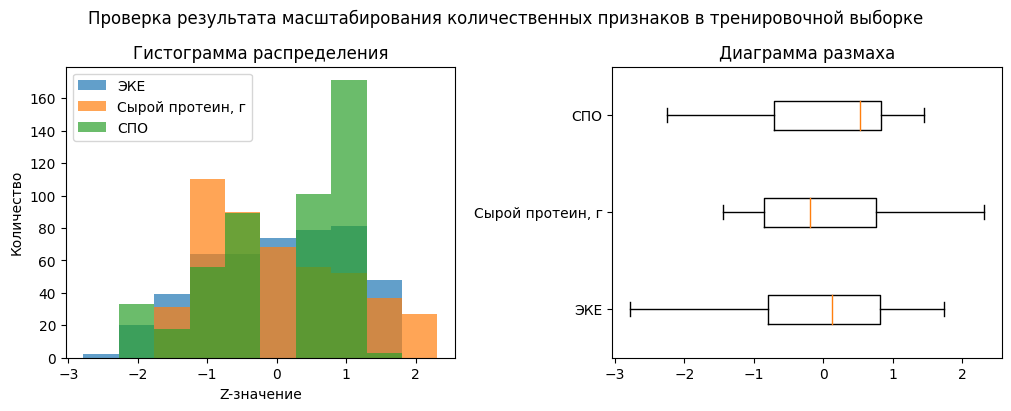

,Признак,Коэффициент линейной регрессии
0,1,6262.103880
1,pasture_type_холмистое,50.869603
2,dad_breed_Соверин,-240.402329
3,age_category_менее_2_лет,-237.040732
4,energetic_feed_units,156.838634
5,raw_protein_g,50.625898
6,sugar_protein_ratio,162.456627


,Значение
MSE,43864.7482
RMSE,209.4391
MAE,164.2442
R2,0.7845


Коэффициент детерминации R²: 0.7845
Доверительный интервал прогноза модели: [-328.50, 348.75]


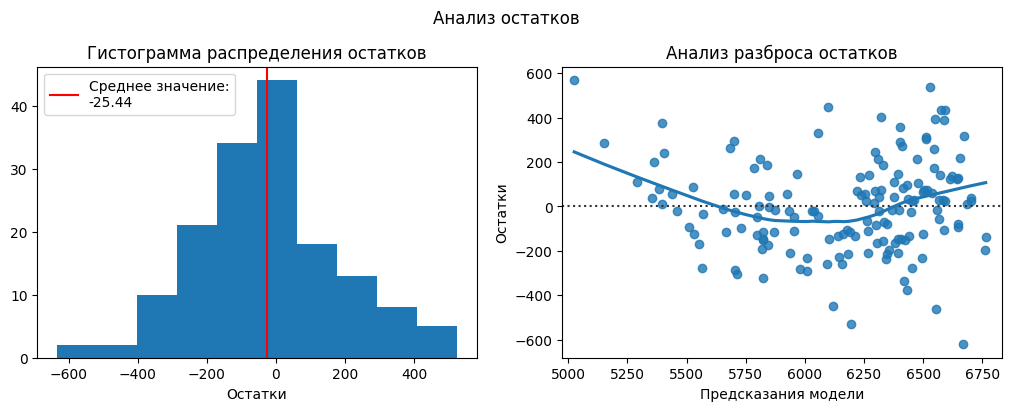

In [61]:
# создаём модель линейной регрессии для предсказания целевого признака по входным признакам, 
# обучаем её на тренировочной выборке из данных таблицы 'cows'
# и проверяем качество модели на тестовой выборке
linreg_model_1, encoder_1, scaler_1, scores_1, confidence_interval_1, residuals_1, coef_table_1 = (
    make_linreg_model(cows, features_1, regression_target)
)

**Проверка результата масштабирования количественных признаков** в тренировочной выборке показывает:
- Большая часть значений находится в промежутке Z-значений (количества стандартных отклонений от среднего значения) от -2 до 2.
- На диаграмме размаха выбросы отсутствуют.

**Анализ метрик качества** модели показывает:
- Среднеквадратичная ошибка (RMSE) предсказаний удоя для модели составляет ≈209 кг, а средняя абсолютная ошибка (MAE) — ≈164 кг.
- Коэффициент детерминации R² показывает, насколько хорошо модель предсказывает целевой признак по входным. Значение R² = 0.7845 означает, что в ≈78 % случаев предсказание модели ближе к истине, чем среднее значение целевого признака. 

**Анализ остатков** показывает:
- Распределение остатков похоже на нормальное и симметрично относительно нуля, значит модель работает качественно.
- Разброс остатков возрастает при больших значениях целевого признака. Из-за этого модель будет работать неустойчиво.
- Зависимость величины остатков от предсказаний модели имеет вид дуги, что указывает на нелинейную связь некоторых из входных признаков с целевым. Нелинейность зависимости целевого признака «Удой» от входных признаков ЭКЕ и СПО уже была обнаружена при анализе совместного распределения признаков по диаграммам рассеяния.

**Анализ коэффициентов регрессии** показывает, что коэффициенты регресии для входных признаков «Тип пастбища» и «Сырой протеин», имеющих невысокие коэффициенты корреляции с целевым признаком, меньше, чем для признаков, сильнее сязанных с целевым. Однако учёт этих двух признаков позволяет немного повысить значения метрик качества модели, поэтому исключать их из рассмотрения не будем.

**Выводы**

1. Коэффициент детерминации R² для первой модели линейной регрессии равен 0.7845. Это означает, что только в ≈78 % случаев предсказание модели ближе к истине, чем среднее значение целевого признака. Результат не очень высокий — модель явно нуждается в улучшении. 

2. Анализ отстатков подтвердил, что модель нуждается в улучшении. Для устранения нелинейности зависимости целевого признака «Удой» от входных признаков ЭКЕ и СПО можно попробовать:
- Поскольку зависимость удоя от СПО имеет ступенчатый характер, преобразовать СПО в категориальный бинарный признак, используя значение порога на ступенчатой зависимости.
- Поскольку зависимость удоя от ЭКЕ имеет степенной характер, ввести новый входной признак «ЭКЕ в квадрате».

3. Дополнительно имеет смысл проводить анализ коэффициентов регрессии, чтобы определить степепь влияния каждого из входных признаков на целевой.

### Вторая модель линейной регресии

В соответствии с выводами о первой модели линейной регрессии, введём новые входные признаки, которые будут линейно связаны с целевым:
- Признак «Категория СПО» (`sugar_protein_ratio_category`) — категориальный бинарный признак, показывающий факт превышения порогового значения. Пороговое значение выберем равным 0.915, исходя из анализа гистограмм распределения СПО и диаграммы рассеяния удоя и СПО, чтобы граница была ровно посередине между двумя кластерами.
- Признак «ЭКЕ в квадрате» (`energetic_feed_units_squared`).

Для преобразования данных используем функцию `transform_features()`.

In [62]:
def transform_features(data):
    """
    Добавляет в данные 2 новых признака:
    - sugar_protein_ratio_category, разделяя значения признака sugar_protein_ratio по порогу 0.915,
    - energetic_feed_units_squared, возводя в квадрат  значения признака energetic_feed_units.
    """
    # преобразуем СПО в категориальный бинарный признак, используя значение порога 0.915
    threshold = 0.915
    data['sugar_protein_ratio_category'] = (
        data['sugar_protein_ratio']
        .apply(lambda x: 'менее_' + str(threshold) if x < threshold else 'более_' + str(threshold))
    )
    # добавляем новый признак ЭКЕ в квадрате
    data['energetic_feed_units_squared'] = data['energetic_feed_units'] ** 2

    return data

In [63]:
# устраняем нелинейность зависимости целевого признака «Удой» от входных признаков ЭКЕ и СПО 
cows = transform_features(cows)

# добавляем описания новых признаков в словарь
column_names['sugar_protein_ratio_category'] = 'Категория СПО'
column_names['energetic_feed_units_squared'] = 'ЭКЕ в квадрате'

# проверяем результат добавления новых признаков
cows.head()

cows,id,milk_yield_kg,energetic_feed_units,raw_protein_g,sugar_protein_ratio,breed,pasture_type,dad_breed,fat_percentage,protein_percentage,milk_taste,age_category,sugar_protein_ratio_category,energetic_feed_units_squared
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,менее_0.915,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,менее_0.915,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,менее_0.915,196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,менее_0.915,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,менее_0.915,163.84


После добавления в данные новых признаков полезно снова провести анализ корреляций:
- Рассчитаем коэффициенты корреляции Спирмена между всеми количественными признаками в данных.
- Рассчитаем коэффициенты корреляции фи ($\phi_k$) между целевым признаком в задаче регрессии («Удой») и категориальными признаками в данных (все они являются бинарными).
- Построим диаграмму рассеяния для признака «Удой» и нового количественного признака «ЭКЕ в квадрате» с учётом значения нового категориального признака «Категория СПО».

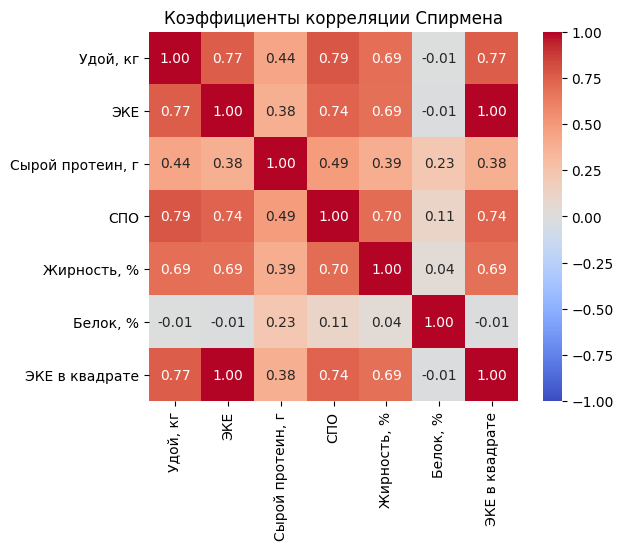

In [64]:
# количественные признаки в таблице 'cows'
cows_num_features = get_num_features(cows)
# строим матрицу корреляции Спирмена количественных признаков
corr_matrix(cows, cows_num_features, method='spearman');

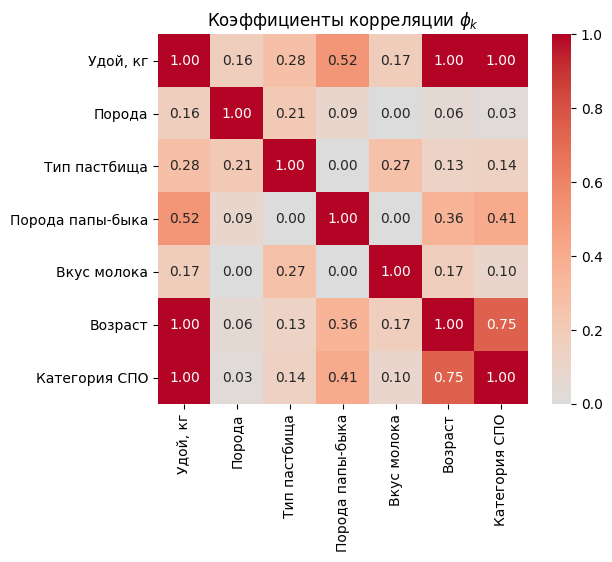

In [65]:
# категориальные признаки в таблице 'cows'
cows_cat_features = get_cat_features(cows)
# строим матрицу корреляции Фи целевого и категориальных входных признаков
corr_matrix(cows, ['milk_yield_kg'] + cows_cat_features, method='phik');

In [66]:
def scatter_plot(data, target_feature, num_feature, cat_feature, ax=None):
    """
    Строит диаграмму рассеяния целевого признака 'target_feature' 
    в зависимости от количественного признака 'num_feature'
    с группировкой по категориальному признаку 'cat_feature'.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(4, 4))
    # описание целевого признака
    target_name = get_column_name(target_feature)  
    # строим диаграмму рассеяния
    sns.scatterplot(data=data, x=num_feature, y=target_feature, hue=cat_feature, alpha=0.5, ax=ax)
    # оформляем графики
    ax.set_xlabel(get_column_name(num_feature))
    ax.set_ylabel(target_name)
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), title=get_column_name(cat_feature))

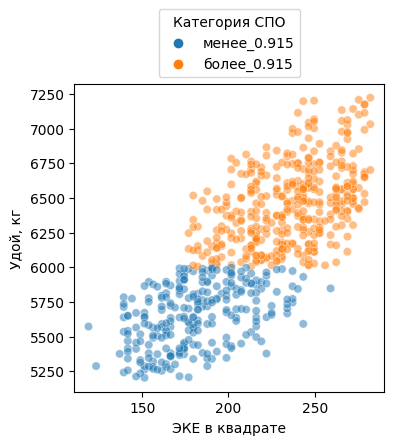

In [67]:
# строим диаграмму рассеяния
scatter_plot(cows, 'milk_yield_kg', 'energetic_feed_units_squared', 'sugar_protein_ratio_category')

Анализ матриц корреляции показывает, что между признаками ЭКЕ и «ЭКЕ в квадрате» имеется **мультиколлинеарность**. Поэтому в список входных признаков для второй модели линейной регрессии добавим только «ЭКЕ в квадрате», связь которого с целевым признаком ближе к линейной.

In [68]:
# проверяем количественные признаки на мультиколлинеарность
# с помощью VIF
check_vif(cows, cows_num_features)

,признак,VIF
0,const,1585474.67
1,"Удой, кг",3.59
2,ЭКЕ,490.84
3,"Сырой протеин, г",1.41
4,СПО,3.54
5,"Жирность, %",1.98
6,"Белок, %",1.09
7,ЭКЕ в квадрате,483.54


Высокие значения VIF признаков ЭКЕ и «ЭКЕ в квадрате» тоже указывают на их мультиколлинеарность.

Сформируем список входных признаков `features_2` для модели. Затем повторим все этапы подготовки данных, создания, обучения и анализа модели линейной регрессии.

In [69]:
# входные признаки
features_2 = [
              'energetic_feed_units_squared', 
              'raw_protein_g',
              'sugar_protein_ratio_category',
              'pasture_type',
              'dad_breed', 
              'age_category',
             ]

Количественные признаки: ['ЭКЕ в квадрате', 'Сырой протеин, г']
Категориальные признаки: ['Категория СПО', 'Тип пастбища', 'Порода папы-быка', 'Возраст']


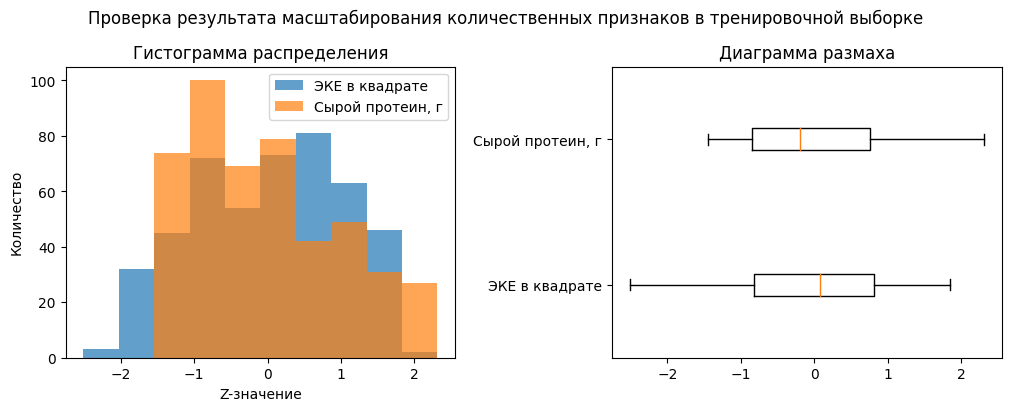

,Признак,Коэффициент линейной регрессии
0,1,6411.282281
1,sugar_protein_ratio_category_менее_0.915,-377.088019
2,pasture_type_холмистое,33.163564
3,dad_breed_Соверин,-211.123313
4,age_category_менее_2_лет,-225.009706
5,energetic_feed_units_squared,154.356915
6,raw_protein_g,49.041895


,Значение
MSE,37130.7282
RMSE,192.6934
MAE,149.1541
R2,0.8176


Коэффициент детерминации R²: 0.8176
Доверительный интервал прогноза модели: [-304.03, 310.72]


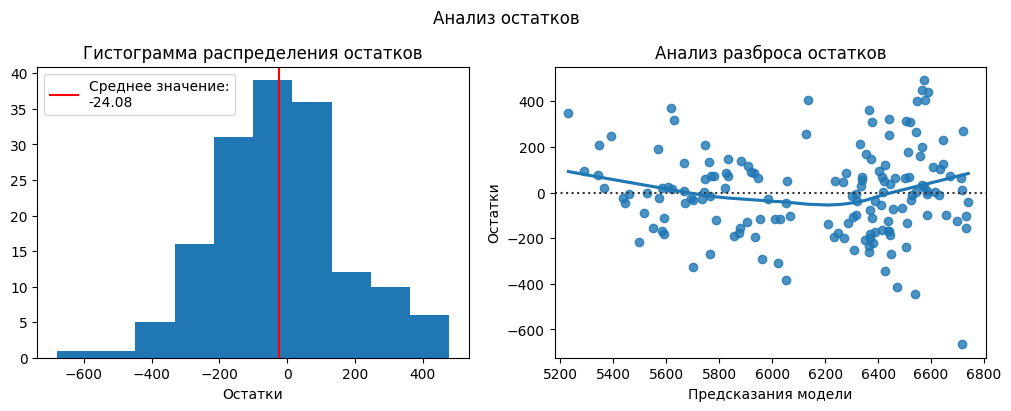

In [70]:
# создаём модель линейной регрессии для предсказания целевого признака по входным признакам, 
# обучаем её на тренировочной выборке из данных таблицы 'cows'
# и проверяем качество модели на тестовой выборке
linreg_model_2, encoder_2, scaler_2, scores_2, confidence_interval_2, residuals_2, coef_table_2 = (
    make_linreg_model(cows, features_2, regression_target)
)

**Выводы**

1. Коэффициент детерминации R² для второй модели линейной регрессии получился выше, чем для первой: ≈0.818. Также уменьшились значения метрик RMSE и MAE, характеризующих среднюю ошибку предсказаний модели. Доверительный интервал прогноза модели тоже сократился.

2. Анализ остатков показывает, что центр их распределения стал ближе к нулю, а дисперсия стала более однородной: разброс остатков на диаграмме рассеяния практически одинаков во всём диапазоне предсказаний модели. Однако стал заметен одиночный выброс с большим отрицательным значением ошибки предсказания.

3. Качество модели повысилось после преобразования входных признаков с целью линеаризации их связи с целевым, но можно попытаться ещё улучшить модель, добавив новый входной признак — «Имя папы» из таблицы `dads`.

### Третья модель линейной регресии

Таблица `dads` с данными о папе каждой коровы в стаде фермера содержит 2 столбца: `id` и `dad_name` («Имя папы»).

In [71]:
# столбцы в таблице 'dads'
dads.columns

Index(['id', 'dad_name'], dtype='object', name='dads')

Добавим признак «Имя папы» в таблицу `cows` с данными о коровах в стаде фермера, соединив её с таблицей `dads` по ключу `id`.

In [72]:
# соединяем таблицы 'cows' и 'dads' по ключу 'id'
cows = cows.merge(dads, on='id', how='left')
# название таблицы
cows.columns.name = 'cows'
# проверяем результат
cows.head()

cows,id,milk_yield_kg,energetic_feed_units,raw_protein_g,sugar_protein_ratio,breed,pasture_type,dad_breed,fat_percentage,protein_percentage,milk_taste,age_category,sugar_protein_ratio_category,energetic_feed_units_squared,dad_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,менее_0.915,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,менее_0.915,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,менее_0.915,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,менее_0.915,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,менее_0.915,163.84,Барин


Как уже было отмечено при обзоре данных, в таблице `cows_buy` существует неоднозначность соответствия имени и породы папы-быка. 

Проверим, существует ли такая же неоднозначность в таблице `cows`. Для этого сгруппируем данные по признаку `dad_name` («Имя папы») и выведем количество уникальных значений признака `dad_breed` («Порода папы-быка»).

In [73]:
# группируем по 'dad_name', считаем уникальные значения 'dad_breed'
cows.groupby('dad_name')['dad_breed'].value_counts()

dad_name  dad_breed
Барин     Соверин      212
          Айдиал        28
Буйный    Айдиал       214
Геркулес  Айдиал        64
Соловчик  Соверин       99
          Айдиал        11
Name: dad_breed, dtype: int64

Действительно, одному и тому же имени может соответствовать 2 значения породы, а значит это разные быки с одинаковыми именами. Поэтому признак `dad_name` нужно рассматривать только в связке с признаком `dad_breed`.

Рассматривать «Имя папы» как отдельный признак некорректно, потому что имя — это только название, которое само по себе не может оказывать влияние на какие-либо признаки. Поэтому введём новый комбинированный признак, сочетающий породу и имя папы-быка — `dad_breed_and_name` («Порода и имя папы-быка»). Этот признак однозначно определяет папу-быка каждой коровы и его можно учитывать при построении третьей модели линейной регресии.

In [74]:
# добавляем новый признак 'Порода и имя папы-быка'
cows['dad_breed_and_name'] = cows['dad_breed'] + '_' + cows['dad_name']

# добавляем описания новых признаков в словарь
column_names['dad_breed_and_name'] = 'Порода и имя папы-быка'

# проверяем результат добавления новых признаков
cows.head()

cows,id,milk_yield_kg,energetic_feed_units,raw_protein_g,sugar_protein_ratio,breed,pasture_type,dad_breed,fat_percentage,protein_percentage,milk_taste,age_category,sugar_protein_ratio_category,energetic_feed_units_squared,dad_name,dad_breed_and_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,менее_0.915,201.64,Буйный,Айдиал_Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,менее_0.915,163.84,Соловчик,Соверин_Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,менее_0.915,196.00,Барин,Соверин_Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,менее_0.915,153.76,Буйный,Айдиал_Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,менее_0.915,163.84,Барин,Соверин_Барин


Сформируем список входных признаков `features_3` для модели. Затем повторим все этапы подготовки данных, создания, обучения и анализа модели линейной регрессии.

In [75]:
# входные признаки
features_3 = [
              'energetic_feed_units_squared', 
              'raw_protein_g', 
              'sugar_protein_ratio_category',
              'pasture_type',
              'dad_breed_and_name',
              'age_category', 
             ]

Количественные признаки: ['ЭКЕ в квадрате', 'Сырой протеин, г']
Категориальные признаки: ['Категория СПО', 'Тип пастбища', 'Порода и имя папы-быка', 'Возраст']


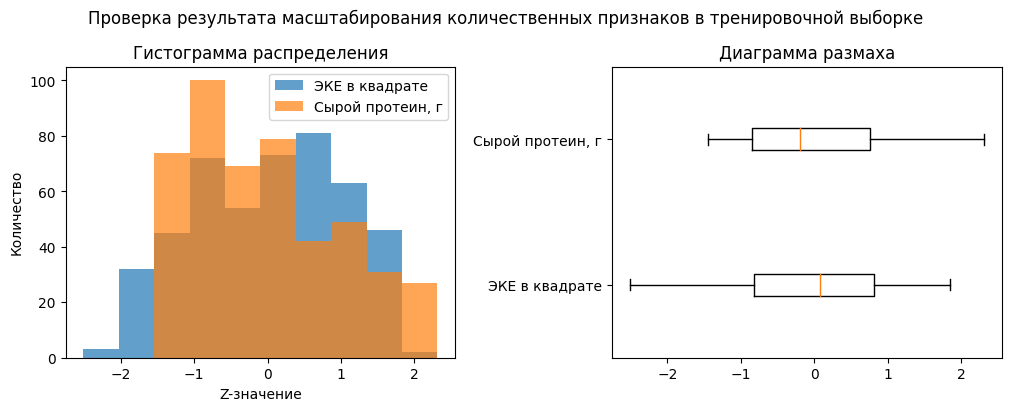

,Признак,Коэффициент линейной регрессии
0,1,6116.378442
1,sugar_protein_ratio_category_менее_0.915,-353.750792
2,pasture_type_холмистое,52.035260
3,dad_breed_and_name_Айдиал_Буйный,301.314665
4,dad_breed_and_name_Айдиал_Геркулес,329.599358
5,dad_breed_and_name_Айдиал_Соловчик,24.116475
6,dad_breed_and_name_Соверин_Барин,45.029583
7,dad_breed_and_name_Соверин_Соловчик,65.920319
8,age_category_менее_2_лет,-193.617845
9,energetic_feed_units_squared,163.096518


,Значение
MSE,36234.1372
RMSE,190.3527
MAE,147.0093
R2,0.8220


Коэффициент детерминации R²: 0.8220
Доверительный интервал прогноза модели: [-269.60, 311.69]


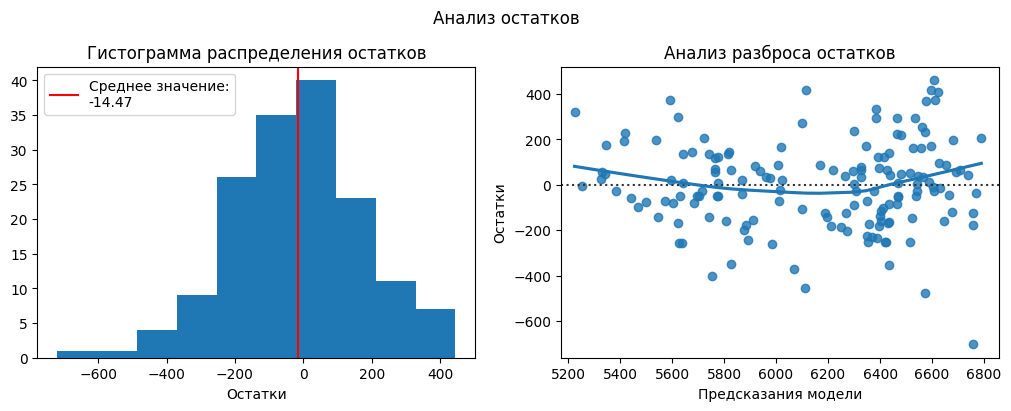

In [76]:
# создаём модель линейной регрессии для предсказания целевого признака по входным признакам, 
# обучаем её на тренировочной выборке из данных таблицы 'cows'
# и проверяем качество модели на тестовой выборке
linreg_model_3, encoder_3, scaler_3, scores_3, confidence_interval_3, residuals_3, coef_table_3 = (
    make_linreg_model(cows, features_3, regression_target)
)

**Выводы**

1. Коэффициент детерминации R² для третьей модели линейной регрессии получился ещё чуть-чуть выше, чем для второй: ≈0.822. Также уменьшились значения метрик RMSE и MAE, характеризующих среднюю ошибку предсказаний модели. Доверительный интервал прогноза модели тоже сократился.

2. Анализ остатков показывает, что центр их распределения стал ближе к нулю, а форма распределения — более симметричной. Таким образом, распределение стало больше похоже на нормальное. Дисперсия остатков изменилась слабо и остаётся примерно однородной. По-прежнему выделяется одиночный выброс с большим отрицательным значением ошибки предсказания.

3. Качество модели незначительно повысилось в результате добавления в данные нового признака. 

### Сравнение моделей линейной регрессии

Сравним качество трёх моделей линейной регрессии, сопоставив их R² и остатки.

In [77]:
# метрики качества моделей
model_scores = [scores_1, scores_2, scores_3]
# названия моделей
model_names = ['модель № 1', 'модель № 2', 'модель № 3']
# названия метрик
score_names = model_scores[0].index
# формируем итоговую таблицу со значениями метрик для каждой модели
score_table = pd.DataFrame(model_scores, index=model_names, columns=score_names)
# округляем значения метрик
score_table[score_names.drop('R2')] = score_table[score_names.drop('R2')].round(1)
score_table['R2'] = score_table['R2'].round(3)
# название таблицы
score_table.columns.name = 'Метрики'

score_table

Метрики,MSE,RMSE,MAE,R2
модель № 1,43864.7,209.4,164.2,0.785
модель № 2,37130.7,192.7,149.2,0.818
модель № 3,36234.1,190.4,147.0,0.822


Значение R² наибольшее у **модели № 3** (0.822). Также у этой модели минимальные значения метрик MSE, RMSE, MAE, характеризующих ошибку предсказания. 

In [78]:
# формируем таблицу с остатками моделей
model_residuals = pd.concat([residuals_1, residuals_2, residuals_3], axis=1)
model_residuals.columns = model_names
# формируем итоговую таблицу со статистическими характеристиками остатков для каждой модели
model_residuals_stat = (
    model_residuals
    .agg(['mean', 'var', 'std', lambda x: x.loc[x.abs().idxmax()]])
    .T
    .rename(columns={'<lambda>': 'max_dev'})
)
# название таблицы
model_residuals_stat.columns.name = 'Остатки'

model_residuals_stat.round(1)

Остатки,mean,var,std,max_dev
модель № 1,-25.4,43494.5,208.6,-632.4
модель № 2,-24.1,36785.3,191.8,-679.3
модель № 3,-14.5,36255.7,190.4,-720.0


Если бы среднее значение остатков модели было точно равно нулю, то дисперсия остатков `var` была бы равна MSE, а стандартное отклонение `std` — RMSE. Тем не менее, по причине малости отклонения среднего значения остатков `mean` от нуля, для всех трёх моделей значения `var` и `std` близки к MSE и RMSE соответственно. Наименьшее значения дисперсии остатков (следовательно, и стандартного отклонения тоже) у **модели № 3**.

Наименьшее отклонение среднего значения остатков `mean` от нуля у **модели № 3**.

Однако у модели  № 3 есть недостаток по сравнению с другими — наибольшее значение максимального отклонения остатков от нуля. Это тот самый выброс, который был заметен на диаграмме рассеяния при анализе остатков модели. Это значит, что в редких случаях модель может сильнее завышать прогноз удоя, чем модели № 1 и № 2. 

Сравним также доверительные интервалы прогноза моделей.

In [79]:
# доверительные интервалы прогноза моделей
confidence_intervals = [confidence_interval_1, confidence_interval_2, confidence_interval_3]
# формируем таблицу с границами доверительных интервалов  для каждой модели
confidence_intervals_table = pd.DataFrame(confidence_intervals, 
                                          index=model_names, 
                                          columns=['нижняя граница', 'верхняя граница'])
confidence_intervals_table['ширина'] = (
    confidence_intervals_table['верхняя граница'] - confidence_intervals_table['нижняя граница']
)
# название таблицы
confidence_intervals_table.columns.name = 'Доверительный интервал'

confidence_intervals_table.round(2)

Доверительный интервал,нижняя граница,верхняя граница,ширина
модель № 1,-328.50,348.75,677.25
модель № 2,-304.03,310.72,614.76
модель № 3,-269.60,311.69,581.29


Доверительный интервал прогноза самый узкий у **модели № 3**.

Дополнительно исследуем коэффициенты линейной регрессии для трёх моделей, чтобы сравнить, как разные модели оценивают влияние каждого входного признака на целевой.

Визуализируем значения коэффициентов на диаграмме, за исключением константы.

,Признак,модель № 1,модель № 2,модель № 3
0,1,6262.103880,6411.282281,6116.378442
1,pasture_type_холмистое,50.869603,33.163564,52.035260
2,dad_breed_Соверин,-240.402329,-211.123313,NaN
3,age_category_менее_2_лет,-237.040732,-225.009706,-193.617845
4,energetic_feed_units,156.838634,NaN,NaN
5,raw_protein_g,50.625898,49.041895,51.869961
6,sugar_protein_ratio,162.456627,NaN,NaN
7,sugar_protein_ratio_category_менее_0.915,NaN,-377.088019,-353.750792
8,energetic_feed_units_squared,NaN,154.356915,163.096518
9,dad_breed_and_name_Айдиал_Буйный,NaN,NaN,301.314665


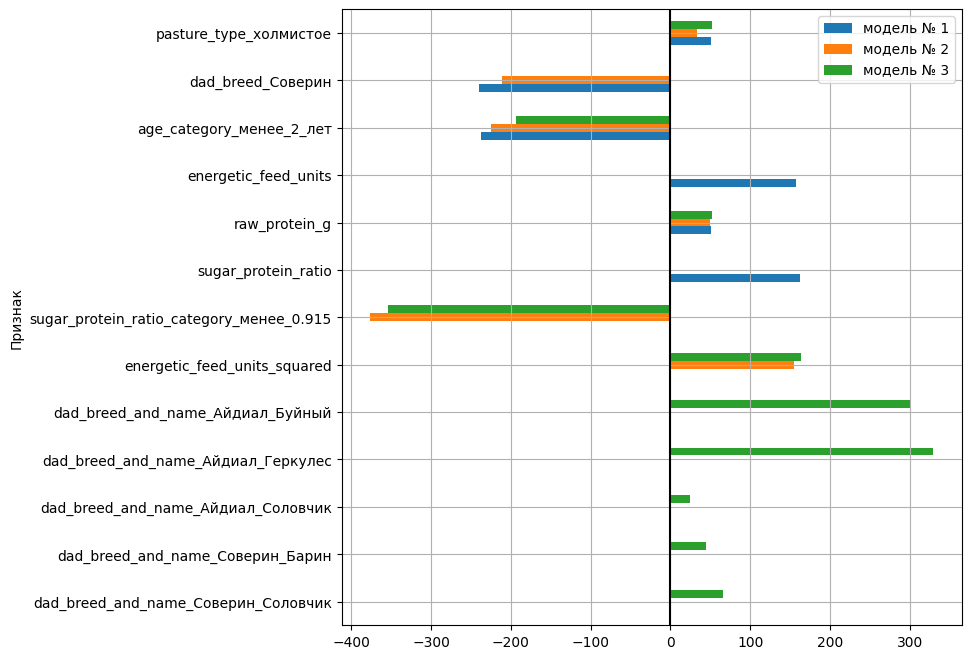

In [80]:
# формируем таблицу с коэффициентами линейной регрессии
coef_table = (
    coef_table_1.rename(columns={'coef': 'модель № 1'})
    .merge(coef_table_2.rename(columns={'coef': 'модель № 2'}), on='feature', how='outer')
    .merge(coef_table_3.rename(columns={'coef': 'модель № 3'}), on='feature', how='outer')
    .rename(columns={'feature': 'Признак'})
)
display(coef_table)

(coef_table[coef_table['Признак'] != '1']
 .sort_index(ascending=False)
 .plot.barh(x='Признак', figsize=(8, 8), grid=True)
)
plt.axvline(x=0, color='0');

- Коэффициенты при одинаковых признаках для трёх моделей меняются не очень сильно, сохраняя постоянный знак. Это говорит о стабильности влияния признаков.

- Величины коэффициентов согласуются с результатами корреляционного анализа признаков. Коэффициенты для признаков `pasture_type_холмистое` («Тип пастбища») и `raw_protein_g` («Сырой протеин») относительно невелики, что согласуется с тем, что у них меньший коэффициент корреляции с целевым признаком, чем у таких признаков как «Порода папы-быка» и ЭКЕ.

**Вывод:**

Несмотря на выявленный недостаток (выброс в остатках), в целом из трёх построенных моделей линейной регрессии наилучшее качество имеет **модель № 3**.

### Выбор лучшей модели

Как показало сравнение качества моделей, из трёх построенных моделей линейной регрессии наилучшая — **модель № 3**, которая учитывает не только породу папы-быка каждой коровы, а конкретного папу-быка посредством комбинированного признака «Порода и имя папы-быка».

Однако применение этой модели для прогноза удоя сталкивается проблемой: в данных о коровах, для которых надо спрогнозировать удой, присутствуют сочетания признаков «Имя папы» и «Порода папы-быка», которых нет в данных о стаде фермера.

In [81]:
# для таблиц `cows` и `cows_buy`:
# группируем по 'dad_name', считаем уникальные значения 'dad_breed'
for data in [cows_buy, cows]:
    print(f'Таблица {data.columns.name}:')
    # группируем по 'dad_name', считаем уникальные значения 'dad_breed'
    print(data.groupby('dad_name')['dad_breed'].value_counts())
    print()

Таблица cows_buy:
dad_name  dad_breed
Барин     Соверин      4
Буйный    Айдиал       5
          Соверин      3
Геркулес  Айдиал       3
          Соверин      3
Соловчик  Соверин      2
Name: dad_breed, dtype: int64

Таблица cows:
dad_name  dad_breed
Барин     Соверин      212
          Айдиал        28
Буйный    Айдиал       214
Геркулес  Айдиал        64
Соловчик  Соверин       99
          Айдиал        11
Name: dad_breed, dtype: int64



Поэтому для прогноза удоя 6 коров, у которых папы — быки породы Соверин по имени Буйный или Геркулес, использовать модель № 3 нельзя, и придётся использовать **модель № 2**, следующую по качеству.

Выведем ещё раз доверительный интервал прогноза лучшей модели № 3, а также модели № 2, которую используем для прогноза удоя коров, для которых модель № 3 не работает.

In [82]:
print('Доверительный интервал прогноза лучшей модели (№ 3): [{:.2f}, {:.2f}]'.format(*confidence_interval_3))
print('Доверительный интервал прогноза модели № 2: [{:.2f}, {:.2f}]'.format(*confidence_interval_2))

Доверительный интервал прогноза лучшей модели (№ 3): [-269.60, 311.69]
Доверительный интервал прогноза модели № 2: [-304.03, 310.72]


### Прогноз удоя коров

Добавим в таблицу с данными о коровах, которых фермер хочет изучить перед покупкой, недостающие признаки: ЭКЕ , «Сырой протеин, г» и СПО. Поскольку для новых коров планируется увеличить значения каждого из этих параметров на 5 %, то для каждого из этих признаков зададим значение, равное среднему значению соответствующего признака для коров в стаде фермера, увеличенному на 5 %.

In [83]:
# задаём значения новых признаков в таблице 'cows_buy'
for col in ['energetic_feed_units', 'raw_protein_g', 'sugar_protein_ratio']:
    cows_buy[col] = cows[col].mean() * 1.05

Преобразуем признаки ЭКЕ и СПО таким же образом, как при подготовке данных для обучения моделей № 2 и № 3 для устранения нелинейной связи с целевым признаком («Удой»):
- Преобразуем количественный признак СПО в категориальный бинарный признак «Категория СПО».
- Ввведём новый признак «ЭКЕ в квадрате».
- Введём новый «Порода и имя папы-быка», как при подготовке данных для обучения модели № 3.

Для преобразования данных используем созданную ранее подготовке данных для обучения модели № 2 функцию `transform_features()`.

In [84]:
# устраняем нелинейность зависимости целевого признака «Удой» от входных признаков ЭКЕ и СПО 
cows_buy = transform_features(cows_buy)
# добавляем новый признак 'Порода и имя папы-быка'
cows_buy['dad_breed_and_name'] = cows_buy['dad_breed'] + '_' + cows_buy['dad_name']
# проверяем результат
cows_buy

cows_buy,breed,pasture_type,dad_breed,dad_name,current_fat_percentage,current_protein_percentage,age_category,energetic_feed_units,raw_protein_g,sugar_protein_ratio,sugar_protein_ratio_category,energetic_feed_units_squared,dad_breed_and_name
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Геркулес
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Буйный
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Барин
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Буйный
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Буйный
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Геркулес
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Геркулес
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Буйный
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Барин
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Буйный


Разобьём таблицу `cows_buy` на две части:
- `cows_buy_3`, к которой для прогноза удоя применим модель № 3, и
- `cows_buy_2`, к которой для прогноза удоя применим модель № 2.

В таблицу `cows_buy_2` выделим тех 6 коров, у которых папы — быки породы Соверин по имени Буйный или Геркулес, и для которых поэтому использовать модель № 3 нельзя.

In [85]:
# выделяем данные о коровах, к которым нельзя применить модель № 3
cows_buy_2 = cows_buy.query('dad_breed_and_name not in @cows.dad_breed_and_name').copy()
# выделяемданные о коровах, к которым можно применить модель № 3
cows_buy_3 = cows_buy.query('dad_breed_and_name in @cows.dad_breed_and_name').copy()

display(cows_buy_2)
cows_buy_3

cows_buy,breed,pasture_type,dad_breed,dad_name,current_fat_percentage,current_protein_percentage,age_category,energetic_feed_units,raw_protein_g,sugar_protein_ratio,sugar_protein_ratio_category,energetic_feed_units_squared,dad_breed_and_name
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Буйный
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Геркулес
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Буйный
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Геркулес
17,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Геркулес
18,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Буйный


cows_buy,breed,pasture_type,dad_breed,dad_name,current_fat_percentage,current_protein_percentage,age_category,energetic_feed_units,raw_protein_g,sugar_protein_ratio,sugar_protein_ratio_category,energetic_feed_units_squared,dad_breed_and_name
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Геркулес
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Барин
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Буйный
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Буйный
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Геркулес
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Барин
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Буйный
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Соловчик
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Геркулес
13,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Барин


Подготовим данные для моделей линейной регрессии: закодируем категориальные признаки и отмасштабируем количественные признаки таким же образом, как при обучении моделей. Для подготовки входных данных используем ранее созданную фунцкцию `prepare_feature_data()`. 

Получим прогнозы удоя коров:
- для коров в таблице `cows_buy_2` с помощью модели № 2,
- для коров в таблице `cows_buy_3` с помощью модели № 3.

Объединим прогнозы с учётом индекса в исходной таблице `cows_buy`, а также рассчитаем доверительный интервал прогноза, т.е. нижнюю и верхнюю границы доверительного интервала.

In [86]:
# кодируем категориальные признаки и масштабируем количественные признаки
# в данных для модели № 2
X_buy_2 = prepare_feature_data(cows_buy_2[features_2], encoder_2, scaler_2)
# кодируем категориальные признаки и масштабируем количественные признаки
# в данных для модели № 3
X_buy_3 = prepare_feature_data(cows_buy_3[features_3], encoder_3, scaler_3)

# получаем прогнозы удоя коров
y_pred_buy_2 = linreg_model_2.predict(X_buy_2)
y_pred_buy_3 = linreg_model_3.predict(X_buy_3)

# объединяем прогнозы
y_pred_buy = pd.concat(
    [pd.Series(y_pred_buy_2, index=cows_buy_2.index), 
     pd.Series(y_pred_buy_3, index=cows_buy_3.index)]
)
# нижняя граница доверительного интервала
y_pred_buy_lowest = pd.concat(
    [pd.Series(y_pred_buy_2 + confidence_interval_2[0], index=cows_buy_2.index), 
     pd.Series(y_pred_buy_3 + confidence_interval_3[0], index=cows_buy_3.index)]
)
# верхняя граница доверительного интервала
y_pred_buy_highest = pd.concat(
    [pd.Series(y_pred_buy_2 + confidence_interval_2[1], index=cows_buy_2.index), 
     pd.Series(y_pred_buy_3 + confidence_interval_3[1], index=cows_buy_3.index)]
)

Добавим прогноз значений удоя в таблицу `cows_buy`:
- столбец `predicted_milk_yield_kg` — прогнозное значение удоя,
- столбец `lowest_predicted_milk_yield_kg` — нижняя граница доверительного интервала прогноза удоя,
- столбец `highest_predicted_milk_yield_kg` — верхняя граница доверительного интервала прогноза удоя.

In [87]:
# добавляем столбцы в таблицу 'cows_buy'
cows_buy['predicted_milk_yield_kg'] = y_pred_buy
cows_buy['lowest_predicted_milk_yield_kg'] = y_pred_buy_lowest
cows_buy['highest_predicted_milk_yield_kg'] = y_pred_buy_highest

# выводим таблицу, отсортированную по убыванию прогноза удоя
cows_buy.sort_values(by='predicted_milk_yield_kg', ascending=False)

cows_buy,breed,pasture_type,dad_breed,dad_name,current_fat_percentage,current_protein_percentage,age_category,energetic_feed_units,raw_protein_g,sugar_protein_ratio,sugar_protein_ratio_category,energetic_feed_units_squared,dad_breed_and_name,predicted_milk_yield_kg,lowest_predicted_milk_yield_kg,highest_predicted_milk_yield_kg
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Геркулес,6613.288518,6343.692837,6924.978536
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Геркулес,6613.288518,6343.692837,6924.978536
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Геркулес,6613.288518,6343.692837,6924.978536
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Буйный,6585.003825,6315.408143,6896.693843
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Буйный,6585.003825,6315.408143,6896.693843
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Буйный,6532.968565,6263.372884,6844.658583
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Буйный,6532.968565,6263.372884,6844.658583
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Буйный,6391.385980,6121.790298,6703.075998
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Соловчик,6349.609479,6080.013797,6661.299497
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Соловчик,6349.609479,6080.013797,6661.299497


### Выводы

1. Для решения задачи регрессии по прогнозированию удоя коров были обучены **три модели линейной регрессии**:
    - модель № 1 — базовая модель, анализ остатков которой показал необходимость её улучшения,
    - модель № 2 — улучшенная модель с исправленной нелинейностью связи между входными признаками ЭКЕ и СПО и целевым признаком,
    - модель № 3 — вариант модели № 2 с учётом дополнительного входного признака (папы-быка каждой коровы).
2. В результате сопоставления метрик качества трёх моделей выбрана **лучшая модель — модель № 3**, имеющая наибольший коэффициент детерминации R² и наименьшие значения метрик MSE, RMSE, MAE, характеризующих ошибку предсказания. 
3. В связи с обнаружением в данных о коровах для покупки значений входного признака «Порода и имя папы-быка», отсутствующих в тренировочных данных, принято решение использовать для прогноза удоя коров, для которых нельзя использовать лучшую модель, следующую по качеству модель — модель № 2.
4. Получен прогноз удоя коров, которых фермер хочет изучить перед покупкой, и рассчитан доверительный интервал прогноза удоя для уровня доверия 0.95.

## Задача классификации

### Обучение модели логистической регрессии

В задаче классификации требуется предсказать вкус молока коров, которых фермер хочет изучить перед покупкой, на основе выявленных связей между оценкой вкуса молока и другими признаками, характеризующими коров в стаде фермера.

Для решения задачи классификации используем модель логистической регрессии. Для обучения модели нужно перевести категориальный признак «Вкус молока» в бинарный, который может принимать значения 1 (молоко вкусное) или 0 (молоко не вкусное). Для этого добавим в таблицу `cows` с данными о коровах в стаде фермера признак `milk_taste_binary` («Вкус молока, бинарный») в соответствии с таблицей преобразования:

milk_taste | milk_taste_binary
--- | ---
вкусно | 1
не вкусно | 0

In [88]:
# создаём словарь со значениями целевого признака
target_dict = {'вкусно': 1, 'не вкусно': 0}
# добавляем новый признак 'milk_taste_binary'
cows['milk_taste_binary'] = cows['milk_taste'].map(target_dict)
# добавляем описания новых признаков в словарь
column_names['milk_taste_binary'] = 'Вкус молока, бинарный'
# проверяем результат
cows.head()

cows,id,milk_yield_kg,energetic_feed_units,raw_protein_g,sugar_protein_ratio,breed,pasture_type,dad_breed,fat_percentage,protein_percentage,milk_taste,age_category,sugar_protein_ratio_category,energetic_feed_units_squared,dad_name,dad_breed_and_name,milk_taste_binary
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,менее_0.915,201.64,Буйный,Айдиал_Буйный,1
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,менее_0.915,163.84,Соловчик,Соверин_Соловчик,1
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,менее_0.915,196.00,Барин,Соверин_Барин,0
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,менее_0.915,153.76,Буйный,Айдиал_Буйный,0
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,менее_0.915,163.84,Барин,Соверин_Барин,1


Целевой признак в задаче классификации — `milk_taste_binary` («Вкус молока, бинарный»).

In [89]:
# целевой признак
classification_target = 'milk_taste_binary'

Для анализа связей между всеми признаками в данных, в том числе бинарными категориальными,  рассчитаем коэффициенты корреляции фи ($\phi_k$).

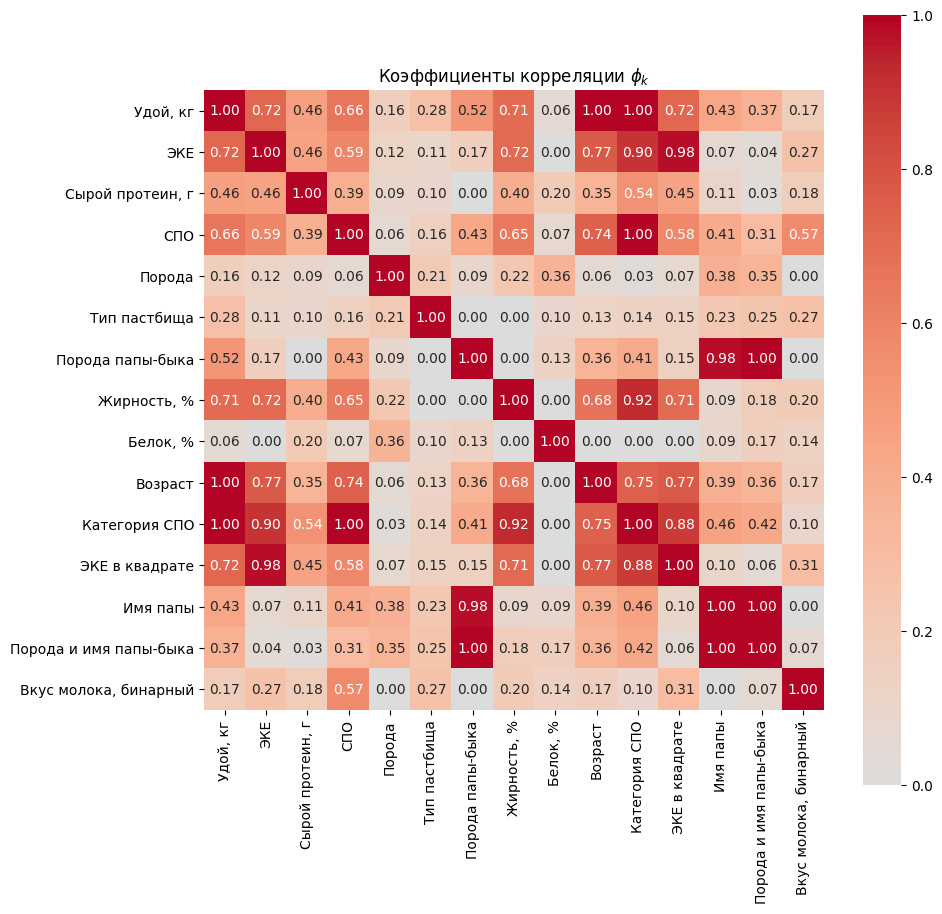

In [90]:
# признаки в таблице 'cows'
cows_features = cows.columns.drop(['id', 'milk_taste'])
# строим матрицу корреляции Фи
ax = corr_matrix(cows, cows_features, method='phik')
try:
    ax.get_figure().set_figwidth(10)
    ax.get_figure().set_figheight(10)
except:
    pass

В качестве входных признаков для обучения модели логистической регрессии отберём признаки, удовлетворяющие следующим условиям:
- Наличие причинно-следственной связи между входным признаком и целевым.
- Наличие связи с целевым признаком — коэффициент корреляции не менее 0.1.
- Наличие данного признака в данных о коровах для покупки.
- Отсутствие мультиколлинеарности с другими выбранными входными признаками. В случае мультиколлинеарности выбирается признак, имеющий более сильную связь с целевым.

Анализ причинно-следственных связей между признаками показывает:
- Вкус молока непосредственно зависит от его характеристик — признаков «Жирность» и «Белок».
- Значения признаков «Жирность» и «Белок», в свою очередь, зависят от характеристик корма коровы. Но в данных о коровах для покупки указаны значения для неизвестных параметров корма. Поэтому использовать для прогнозирования вкуса молока признаки, характеризующие корм коров (ЭКЕ, «Сырой протеин», СПО и производные от них «ЭКЕ в квадрате» и «Категория СПО») **некорректно**.
- Признаки «Удой» и «Имя папы» не имеют причинно-следственной связи с целевым признаком.

Анализ корреляций между признаками показывает:
- Признаки «Порода», «Порода папы-быка», «Порода и имя папы-быка» имеют слишком слабую связь с целевым признаком.

Таким образом, остаётся 4 подходящих входных признака для построения модели логистической регрессии:
- `fat_percentage` (Жирность, %),
- `protein_percentage` (Белок, %),
- `pasture_type` (Тип пастбища),
- `age_category` (Возраст).

Сформируем список входных признаков `features` для модели.

In [91]:
# входные признаки
features = [ 
            'fat_percentage',
            'protein_percentage',
            'pasture_type',
            'age_category',
           ]

Чтобы убедиться в наличии значимой связи между выбранными входными признаками и целевым, исследуем распределения значений признаков для каждого из двух значений целевого признака.

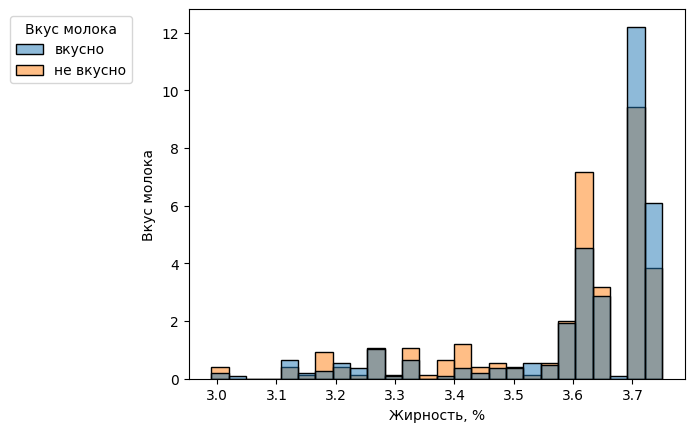

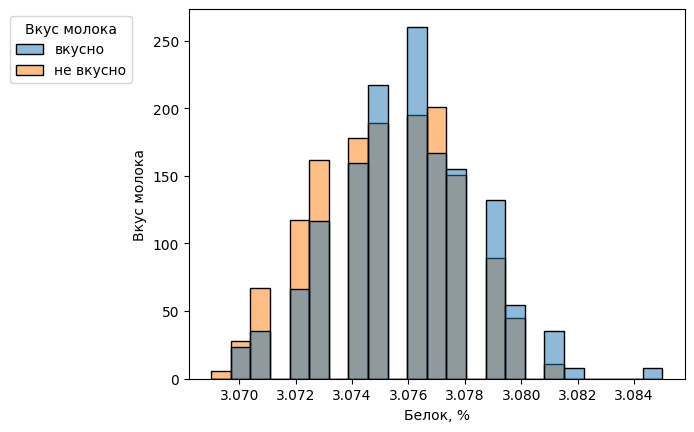

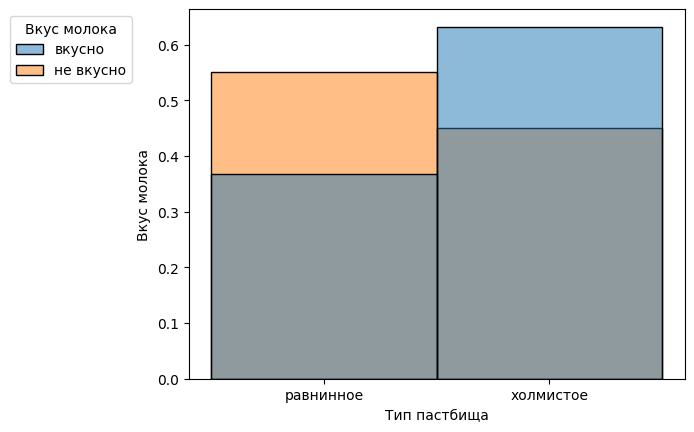

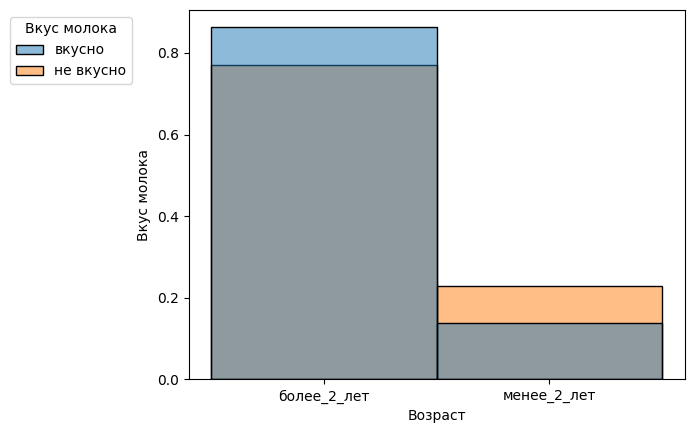

In [92]:
# строим графики распределения значений признаков 
# для разных значений целевого признака
target_feature = 'milk_taste'

for feature in features:
    # описание целевого признака
    target_name = get_column_name(target_feature)
    # создаём область построения графика
    fig, ax = plt.subplots()
    # строим и оформляем график
    ax = sns.histplot(cows, x=feature, hue=target_feature, stat='density', common_norm=False, ax=ax)
    ax.set_xlabel(get_column_name(feature))
    ax.set_ylabel(target_name)
    leg = ax.get_legend()
    leg.set_title(target_name)
    leg.set_bbox_to_anchor((-0.1, 1))

Анализ графиков распределения показывает:
- Молоко с высокой жирностью чаще оказывается вкусным.
- Молоко с более высоким содержанием белка чаще оказывается вкусным, а с более низким — невкусным.
- Молоко коров, пасущихся на холмистых пастбищах, чаще оказывается вкусным, а пасущихся на равнинных — невкусным.
- Молоко коров старше 2 лет чаще оказывается вкусным, а младше 2лет — невкусным.

Таким образом, зависимость целевого признака «Вкус молока» от рассмотренных входных признаком действительно существует.

Подготовим данные и обучим на них модель логистической регрессии:

1. **Разделим данные** на тренировочную и тестовую выборки в отношении 3:1.

2. **Подготовим данные** для модели: закодируем категориальные признаки и отмасштабируем количественные признаки в тренировочной выборке и в тестовой выборке. Количественные признаки приведём к одному масштабу с помощью стандартизации, используя `StandardScaler`. Категориальные признаки закодируем в набор бинарных, используя `OneHotEncoder`. Для подготовки входных данных используем фунцкцию `prepare_feature_data()`. Эта функция также позволяет проверить результат масштабирования количественных признаков в тренировочной выборке по гистограмме распределения и диаграмме размаха.

3. Создадим **модель логистической регресии** и обучим её на подготовленных данных.

4. Оценим **качество модели** на тестовой выборке: рассчитаем метрики качества модели Accuracy, Precision, Recall. Для этого используем фунцкцию `model_scores_classification()`.

5. Для анализа количества ошибочных прогнозов принадлежности к каждому классу построим **матрицу ошибок** модели. Для этого используем фунцкцию `check_confusion_matrix()`.

6. Дополнительно проведём **анализ весов признаков**, чтобы определить степепь влияния каждого из входных признаков на целевой. Для этого используем фунцкцию `check_coef_logreg()`.

Все этапы подготовки данных, создания, обучения и анализа модели объединим в функцию `make_logreg_model()`.

In [93]:
def check_coef_logreg(model, X_train):
    """
    Возвращает таблицу с коэффициентами логистической регрессии.
    """
    # получаем список коэффициентов и добавляем к ним свободный член
    coefs = np.concatenate((model.intercept_, model.coef_[0, :]))
    # получаем имена признаков в тренировочной выборке и добавляем к ним константу 1
    feature_names = ['1'] + X_train.columns.tolist()
    # формируем таблицу
    coef_table = pd.DataFrame({
        'Признак': feature_names, 
        'Коэффициент логистической регрессии': coefs
    })
    
    return coef_table

In [94]:
def model_scores_classification(y_test, y_pred):
    """
    Возвращает и выводит в виде таблицы значения метрик качества 
    модели классификации: Accuracy, Precision, Recall.
    """
    # считаем метрики:
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # объединяем значения в Series
    scores = pd.Series([acc, precision, recall], index=['Accuracy', 'Precision', 'Recall'])
    
    return scores

In [95]:
def check_confusion_matrix(y_test, y_pred):
    """
    Строит и возвращает матрицу ошибок модели классификации.
    """
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
    plt.xlabel('Предсказанное значение')
    plt.ylabel('Истинное значение')
    plt.title('Матрица ошибок модели')

    return cm

In [96]:
def make_logreg_model(data, features, target):
    """
    Создаёт модель логистической регрессии для предсказания целевого признака 'target'
    по входным признакам 'features', обучает её на тренировочной выборке из данных 'data'
    и проверяет качество модели на тестовой выборке.
    
    Возвращает:
    model - модель (объект класса LinearRegression),
    encoder - объект класса OneHotEncoder,
    scaler - объект класса StandardScaler,
    scores - метрики качества модели (объект Series),
    y_test - истинные значения принадлежности к классу 1 в тестовой выборке (объект Series),
    y_proba - предсказанные вероятности принадлежности к классу 1 (объект numpy.ndarray).
    """
    # выделяем в отдельные переменные входные признаки и целевой признак
    X = data[features]
    y = data[target]
    
    # разделяем данные на тренировочную и тестовую выборки, 
    # фиксируем разбиение с помощью указания random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, stratify=y)
    
    # кодируем категориальные признаки и масштабируем количественные признаки в тренировочной выборке,
    # проверяем результата масштабирования количественных признаков в тренировочной выборке
    X_train, encoder, scaler = prepare_feature_data(X_train, check_scaling=True)
    # кодируем категориальные признаки и масштабируем количественные признаки в тестовой выборке
    X_test = prepare_feature_data(X_test, encoder, scaler)

    # создаём экземпляр класса LogisticRegression
    model = LogisticRegression()
    # обучаем модель на тренировочных данных
    model.fit(X_train, y_train)
    
    # проводим анализ коэффициентов логистической регрессии
    coef_table = check_coef_logreg(model, X_train)
    display(coef_table)
    
    # получаем предсказания модели на тестовых данных
    y_pred = model.predict(X_test)
    # вычисляем метрики качества модели
    scores = model_scores_classification(y_test, y_pred)
    # выводим значения метрик
    display(scores.round(3).to_frame().rename(columns={0: 'Значение'}))

    # выводим матрицу ошибок для модели в виде тепловой карты
    cm = check_confusion_matrix(y_test, y_pred)

    # вероятности принадлежности объектов к классу 1
    y_proba = model.predict_proba(X_test)[:, 1]

    return model, encoder, scaler, scores, y_test, y_proba

Количественные признаки: ['Жирность, %', 'Белок, %']
Категориальные признаки: ['Тип пастбища', 'Возраст']


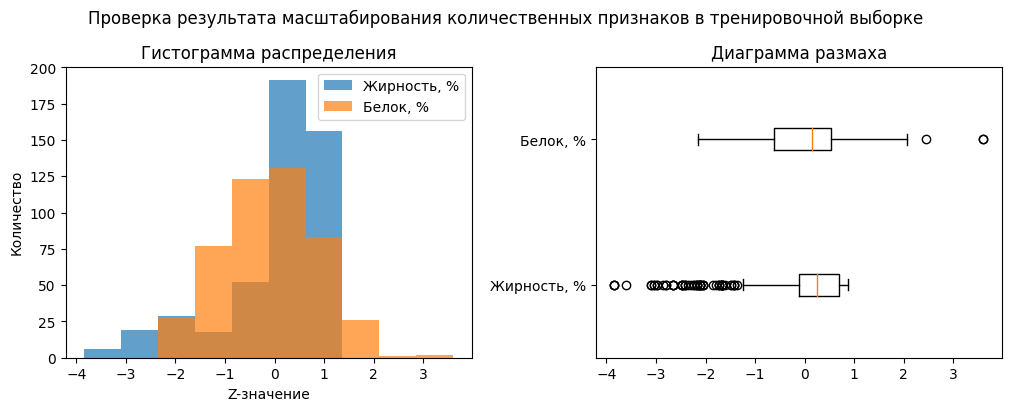

,Признак,Коэффициент логистической регрессии
0,1,0.073940
1,pasture_type_холмистое,0.706996
2,age_category_менее_2_лет,-0.545608
3,fat_percentage,0.155326
4,protein_percentage,0.244385


,Значение
Accuracy,0.618
Precision,0.640
Recall,0.793


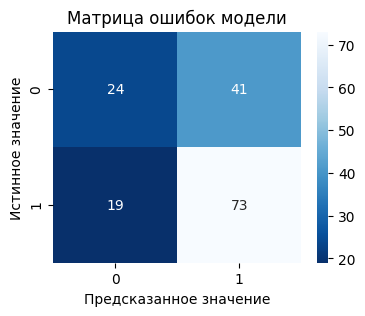

In [97]:
# создаём модель логистической регрессии для предсказания целевого признака по входным признакам, 
# обучаем её на тренировочной выборке из данных таблицы 'cows'
# и проверяем качество модели на тестовой выборке
logreg_model, encoder, scaler, scores, y_test, y_proba = make_logreg_model(
    cows, features, classification_target)

**Проверка результата масштабирования количественных признаков** в тренировочной выборке показывает:
- Большая часть значений находится в промежутке Z-значений (количества стандартных отклонений от среднего значения) от -2 до 2, однако есть отдельные значения, выходящие за пределы ±3.

- На диаграмме размаха имеются выбросы. Много выбросов в распределении значений признака «Жирность», потому что его распределение существенно отличается от нормального и смещено в одну сторону. Наличие выбросов может негативно отразиться на качестве прогноза модели.

**Анализ метрик качества** модели показывает:
- Доля правильных прогнозов модели (метрика Accuracy) не высокая, ≈ 62 %.
- Модель правильно предсказывает принадлежность к классу 1 в ≈ 64 % случаев (метрика Precision).
- Модель обнаруживает объекты класса 1 в ≈ 79 % случаев (метрика Recall). 

**Анализ матрицы ошибок** модели на тестовой выборке показывает:
- Ошибок первого рода (False Positive): FP = 41.
- Ошибок второго рода (False Negative): FN = 19.

**Анализ весов признаков** показывает, что наибольший вес имеет признак «Тип пастбища».

### Настройка модели логистической регрессии

При принятии решения о покупке новых коров в стадо для фермера главное — получить от них вкусное молоко. 
- Ошибка первого рода (False Positive, FP) приведёт к тому, что будет куплена корова, которая будет давать невкусное молоко. В результате будут потрачены деньги на покупку, а также на питание и содержание коровы, а дохода от неё не будет, т.к. невкусное молоко будет забраковано и не пойдёт на продажу. Поэтому для фермера это будет прямой убыток.
- Ошибка второго рода (False Negative, FN) приведёт к тому, что не будет куплена корова, которая давала бы вкусное молоко. Это потенциально упущенная выгода для фермера, но прямого убытка не будет. К тому же остаётся шанс купить эту корову в будущем, когда удастся повысить точность прогнозирования.

Таким образом, в данной ситуации более критичны ошибки **первого рода** (FP), которые приводят к прямому убытку. Для минимизации количества ошибок FP нужно максимизировать значение метрики **Precision**, которая показывает долю правильных предсказаний принадлежности к классу 1.

Попытаемся максимизировать значение метрики Precision, снизив количество ошибок типа FP до нуля путём изменения порога классификации. Для уменьшения количества ошибок типа FP нужно увеличивать минимальное пороговое значение вероятности принадлежности объекта к классу 1, при котором объекту присваивается класс 1, начиная от значения по умолчанию 0.5. 

Оптимальным будет ближайшее к 0.5 значение порога классификации, при котором количество ошибок модели заданного типа (в рассматриваемой ситуации — FP) станет равно целевому минимуму (желательно, нулю). При этом метрика Precision станет равна 1.

Для определения оптимального значения порога используем функцию `adjust_threshold()`, которая помимо подбора оптимального порога классификации, при котором достигается максимальное значение метрики Precision, рассчитывает метрики Precision и Recall и матрицу ошибок для модели с оптимальным порогом, а также строит графики зависимости метрик от значения порога.

In [98]:
def adjust_threshold(y_true, y_proba):
    """
    Возвращает порог классификации, при котором Precision = 1.
    Строит графики зависимости метрик Precision и Recall 
    от значения порога классификации.
    """
    # получаем значения метрик и порогов
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    precision, recall = precision[:-1], recall[:-1]
    
    # строим график зависимости метрик от порога
    plt.plot(thresholds, precision, label='Precision')
    plt.plot(thresholds, recall, label='Recall')
    plt.ylim((0, 1))
    plt.xlabel('Порог классификации')
    plt.ylabel('Значение метрики')
    plt.title('Зависимость метрик \nот порога классификации')
    plt.legend()
    plt.show()
    
    # находим наилучшее значение порога
    precision_max = precision.max()
    threshold_best = thresholds[np.nonzero(precision == precision_max)[0][0]]
    print(f'Оптимальное значение порога классификации: {threshold_best:.6g}')
    
    # присваиваем метки классов с учётом наилучшего значения порога
    y_pred = np.where(y_proba >= threshold_best, 1, 0)
    
    # вычисляем метрики качества модели
    scores = model_scores_classification(y_true, y_pred)
    # выводим значения метрик
    display(scores.round(3).to_frame().rename(columns={0: 'Значение'}))

    # выводим матрицу ошибок для модели в виде тепловой карты
    cm = check_confusion_matrix(y_true, y_pred)
    plt.show()
    
    return threshold_best

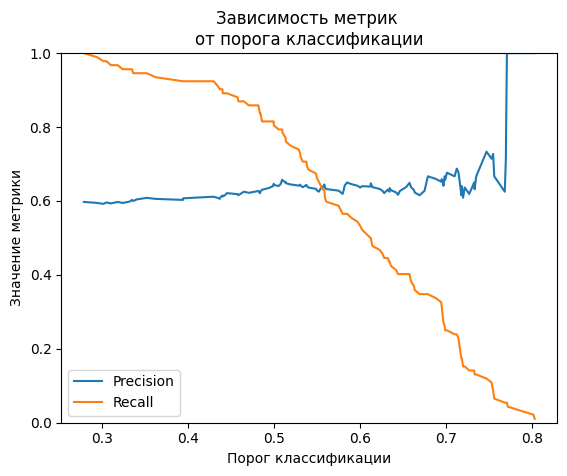

Оптимальное значение порога классификации: 0.770418


,Значение
Accuracy,0.446
Precision,1.000
Recall,0.054


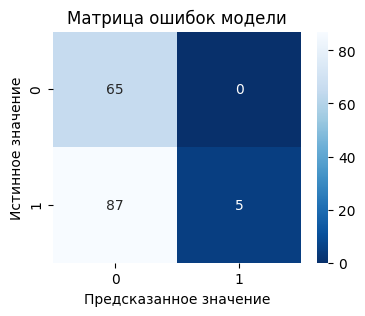

In [99]:
# находим оптимальный порог классификации, при котором Precision = max
threshold_best = adjust_threshold(y_test, y_proba)

В результате для значения порога классификации 0.770418 количество ошибок FP = 0, и следовательно метрика Precision = 1. Однако при этом метрика Recall = 0.054, т.е. модель обнаруживает только ≈5.4 % объектов класса 1. А в данных о коровах для покупки всего 20 записей, из которых 16 уникальных. Поэтому такая модель может забраковать всех коров с потенциально вкусным молоком.

**Выводы:**

1. Построена модель логистической регрессии для решения задачи классификации — прогноза вкуса молока коров (вкусно/не вкусно).
2. Проведена оптимизация модели с целью минимизации количества ошибок первого рода (FP) путём подбора порога классификации. Найдено минимальное значение порога, при котором значение количества ошибок FP = 0 и соответственно метрика Precision = 1.
3. При значении порога классификации, для которого Precision = 1, значение метрики Recall оказывается очень малым, что заставляет беспокоиться, не забракует ли модель всех коров, которых фермер хочет изучить перед покупкой.

### Прогноз вкуса молока коров

Используя построенную модель логистической регрессии с найденным оптимальным порогом классификации, спрогнозируем вероятность получить вкусное молоко от коров, которых фермер хочет изучить перед покупкой. После этого присвоим прогнозные метки «вкусно»/«не вкусно», используя найденное значение порога классификации, при котором модель имеет Precision = 1.

In [100]:
# кодируем категориальные признаки и масштабируем количественные признаки
# в данных для модели логистической регрессии
X_buy = prepare_feature_data(
    cows_buy
        .rename(columns={'current_fat_percentage': 'fat_percentage',
                         'current_protein_percentage': 'protein_percentage',
                        }
        )
        [features], 
    encoder, scaler)

# получаем прогноз вероятности принадлежности к классу 1 (молоко вкусное)
y_proba_buy = logreg_model.predict_proba(X_buy)[:, 1]
# добавляем столбец с вероятностью принадлежности к классу 1 в таблицу 'cows_buy'
cows_buy['milk_taste_good_proba'] = y_proba_buy

# присваиваем классы 1 и 0, используя оптимальный порог классификации
y_pred_buy = np.where(y_proba_buy >= threshold_best, 1, 0)
# добавляем столбец с предсказанием класса в таблицу 'cows_buy'
cows_buy['predicted_milk_taste'] = y_pred_buy
# преобразуем метки классов 1 и 0 в категории 'вкусно' и 'не вкусно'
cows_buy['predicted_milk_taste'] = cows_buy['predicted_milk_taste'].map({1: 'вкусно', 0: 'не вкусно'})

# выводим таблицу, отсортированную по убыванию прогноза удоя
cows_buy.sort_values(by='predicted_milk_yield_kg', ascending=False)

cows_buy,breed,pasture_type,dad_breed,dad_name,current_fat_percentage,current_protein_percentage,age_category,energetic_feed_units,raw_protein_g,sugar_protein_ratio,sugar_protein_ratio_category,energetic_feed_units_squared,dad_breed_and_name,predicted_milk_yield_kg,lowest_predicted_milk_yield_kg,highest_predicted_milk_yield_kg,milk_taste_good_proba,predicted_milk_taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Геркулес,6613.288518,6343.692837,6924.978536,0.687964,не вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Геркулес,6613.288518,6343.692837,6924.978536,0.687964,не вкусно
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Геркулес,6613.288518,6343.692837,6924.978536,0.127594,не вкусно
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Буйный,6585.003825,6315.408143,6896.693843,0.398217,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Буйный,6585.003825,6315.408143,6896.693843,0.312710,не вкусно
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Буйный,6532.968565,6263.372884,6844.658583,0.488536,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Буйный,6532.968565,6263.372884,6844.658583,0.488536,не вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Айдиал_Буйный,6391.385980,6121.790298,6703.075998,0.587230,не вкусно
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Соловчик,6349.609479,6080.013797,6661.299497,0.771371,вкусно
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Соловчик,6349.609479,6080.013797,6661.299497,0.262809,не вкусно


### Выводы

1. Для решения задачи классификации по прогнозированию вкуса молока коров была обучена модель логистической регрессии.
2. Модель оптимизирована с целью минимизации количества ошибок первого рода (FP) путём подбора порога классификации. Минимизация количества ошибок первого рода в данной задаче означает минимизацию риска прямых убытков от ошибок прогнозирования. В результате достигнуто значение метрики Precision = 1, что означает наилучшую точность модели, однако при этом значение метрики Recall оказывается малым (0.054).
3. Получен прогноз вкуса молока коров, которых фермер хочет изучить перед покупкой, с помощью обученной модели логистической регрессии с использованием найденного оптимального порога классификации.

## Итоговые выводы

### Выбор коров, рекомендуемых для покупки

Отберём коров **рекомендуемых для покупки** — тех, у которых спрогнозировано вкусное молоко и нижняя граница доверительного интервала прогноза удоя превышает заданное минимальное значение 6000 кг в год. Отсортируем их по убыванию прогноза удоя.

In [101]:
# отбираем коров с нижней границей прогноза удоя > 6000 кг и вкусным молоком,
# выводим таблицу, отсортированную по убыванию прогноза удоя
cows_good = (
    cows_buy
    .query("lowest_predicted_milk_yield_kg > 6000 and predicted_milk_taste == 'вкусно'")
    .sort_values(by='predicted_milk_yield_kg', ascending=False)
)
cows_good

cows_buy,breed,pasture_type,dad_breed,dad_name,current_fat_percentage,current_protein_percentage,age_category,energetic_feed_units,raw_protein_g,sugar_protein_ratio,sugar_protein_ratio_category,energetic_feed_units_squared,dad_breed_and_name,predicted_milk_yield_kg,lowest_predicted_milk_yield_kg,highest_predicted_milk_yield_kg,milk_taste_good_proba,predicted_milk_taste
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,0.958744,более_0.915,233.361138,Соверин_Соловчик,6349.609479,6080.013797,6661.299497,0.771371,вкусно


В списке рекомендуемых для покупки только одна корова с порядковым номером 16 (нумерация начинается с 0).

Доверительный интервал был рассчитан для уровня доверия 0.90, поэтому вероятность того, что удой этой коровы будет выше нижней границы доверительного интервала (≈6080 кг), составляет $P_{yield}$ = 95 %. 

Согласно предсказанию модели логистической регрессии, вероятность получить вкусное молоко от этой коровы  составляет $P_{taste}$ = 77.1 %.

Таким образом, полная вероятность того, что корова, рекомендованная к покупке будет иметь удой более 6000 кг и вкусное молоко, составляет не менее $P \ge P_{yield} P_{taste}$ ≈ 73 %. Следовательно, риск купить корову, не соответствующую требованиям к величине удоя и вкусу молока, составляет не более 27 %.

### Рекомендации для фермера

- С наименьшим риском можно купить только одну корову с порядковым номером в таблице **16** (нумерация начинается с 0). Для этой коровы риск несоответствия требованиям к удою и вкусу молока не превышает 27 %.
- Стоит попросить продавца предоставить **данные о фактических параметрах корма коров**: ЭКЕ, Сырой протеин, СПО, чтобы учесть их при прогнозировании вкуса молока. Это позволит получить более точный прогноз, благодаря чему можно будет выявить больше коров с потенциально вкусным молоком и снизить риск неверного прогноза. 

### Выводы о моделях линейной регрессии и логистической регрессии

- В задаче построения регрессионной модели для прогнозирования удоя коров были использованы следующие способы улучшения качества регрессионной модели:
    - Линеаризация связи между входным и целевым признаками с помощью математических преобразований (перевод ЭКЕ в «ЭКЕ в квадрате»).
    - Перевод количественного входного признака, нелинейно связанного с целевым, в категориальный (перевод признака СПО в категориальный с разделением по пороговому значению).
    - Введение в модель дополнительного категориального входного признака (добавление в данные сведений о папе каждой коровы).

- Дальнейшее улучшение качества регрессионной модели вполне возможно. Например, можно попробовать:
    - Более тщательно подобрать функцию для линеаризации связи между ЭКЕ и удоем. Не факт, что возведение в квадрат — это наилучший вариант, возможно, нужно рассмотреть и более высокие степени и их линейную комбинацию.
    - Повысить качество тренировочных данных для модели: удалить достаточно редкие значения; сократить диапазон значений признаков в тренировочных данных, чтобы модель лучше описывала данные в том диапазоне значений признаков, где нужно сделать прогноз.
    - Использовать для обучения модели больше входных признаков, линейно связанных с целевым. Для этого такие признаки должны присутствовать и тренировочных данных, и в данных, для которых нужно сделать прогноз.

- При анализе рисков или экономических расчётов важно учитывать метрики качества моделей классификации Precision и Recall. Метрика Accuracy показывает только общую долю верных предсказаний модели, не делая различия между ошибками первого рода (False Positive, FP) и второго рода (False Negative, FN). А в реальных ситуациях цена ошибок FP и FN и связанный с ними риск может существенно отличаться. Поэтому:
    - Если требуется как можно точнее отобрать только подходящие объекты (т.е. минимизировать количество ошибок FP), то нужно ориентироваться на большее значение метрики Precision.
    - Если требуется выявить как можно больше подходящих объектов (т.е. минимизировать количество ошибок FN), то нужно ориентироваться на большее значение метрики Recall.

## Заключение

В данном проекте разработаны две **модели машинного обучения**, которые помогут фермеру управлять рисками и принимать объективное решение о покупке коров для молочного хозяйства:
- Модель линейной регрессии для прогнозирования возможного удоя коровы;
- Модель логистической регрессии для прогнозирования того, будет ли вкусным молоко коровы.

С помощью созданных моделей отобраны коровы для покупки по двум критериям:
- Предсказанный средний удой за год — не менее 6000 кг с учётом погрешности прогноза,
- Предсказано, что молоко будет вкусным.